In [1]:
import numpy as np
import sklearn
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn import  ensemble, preprocessing, metrics
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import os
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

## 資料讀取與前處理

In [2]:
#讀取資料 
df = pd.read_csv("D:\\HC\\碩士班課程\\機器學習原理\\Student Depression Dataset.csv")
path = "D:\\HC\\碩士班課程\\機器學習原理\\" #設定存檔路徑

In [3]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


C:\Users\Huici\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Huici\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Huici\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

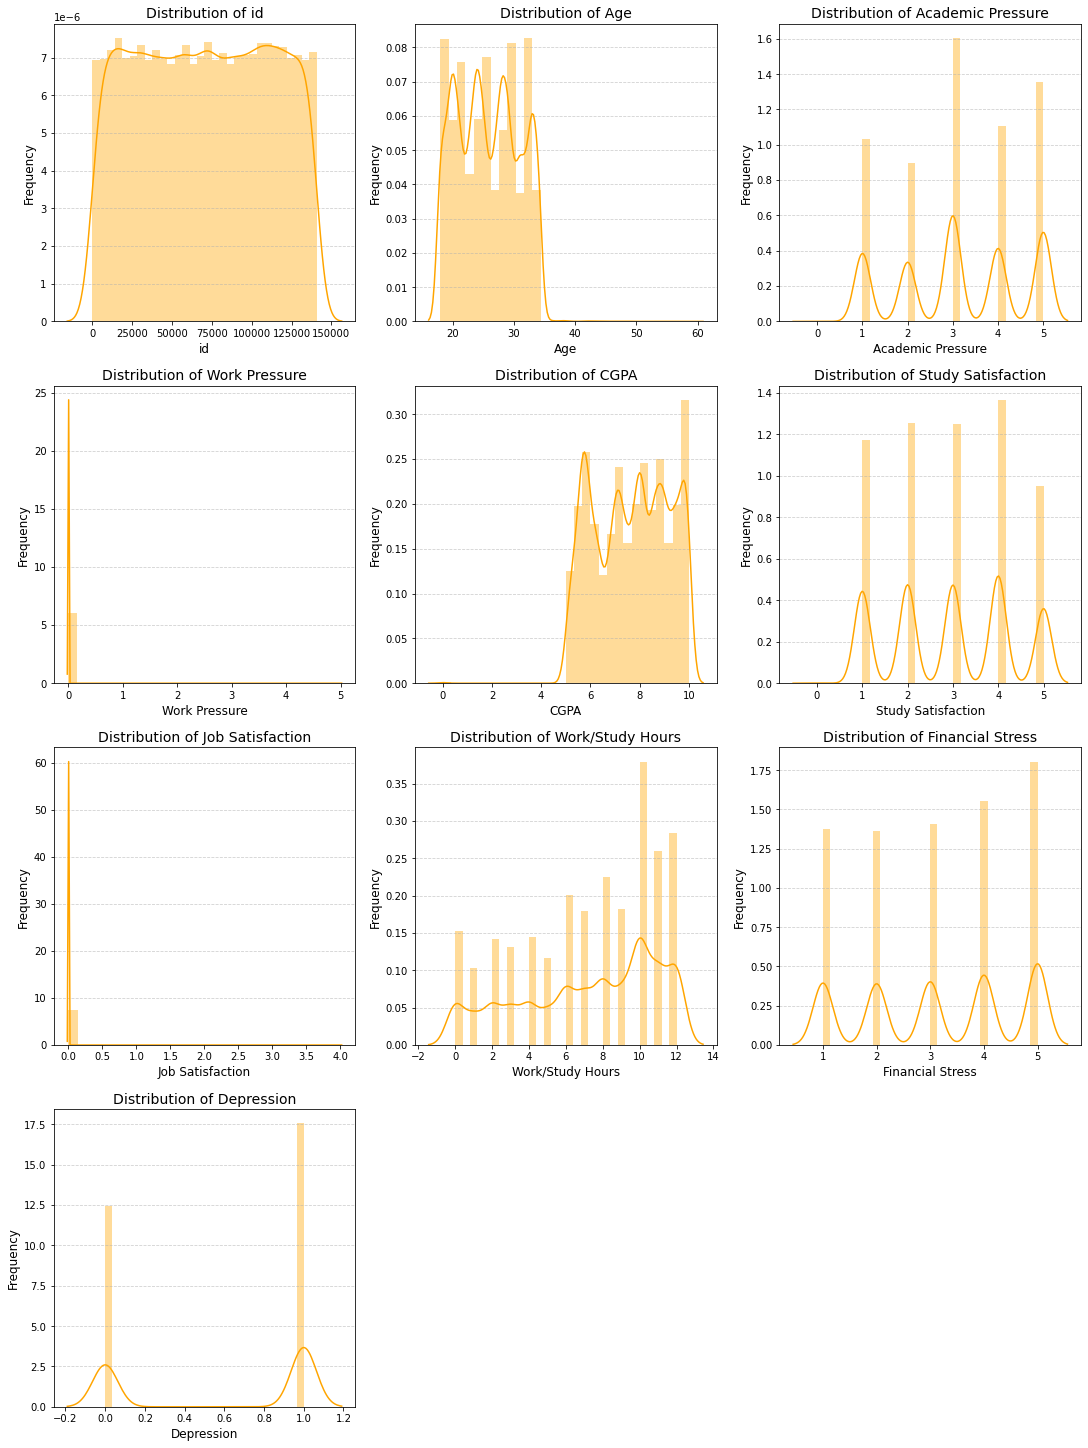

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 選擇數值型欄位
numerical_columns = df.select_dtypes(include=['number']).columns

# 設定子圖的行列數
num_cols = len(numerical_columns)
cols = 3
rows = (num_cols + cols - 1) // cols

# 創建子圖
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)
axes = axes.flatten()

# 繪製每個數值型特徵的分佈圖
for i, col in enumerate(numerical_columns):
    sns.distplot(df[col], kde=True, bins=30, color='orange', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_ylabel("Frequency", fontsize=12)

# 刪除多餘的子圖
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


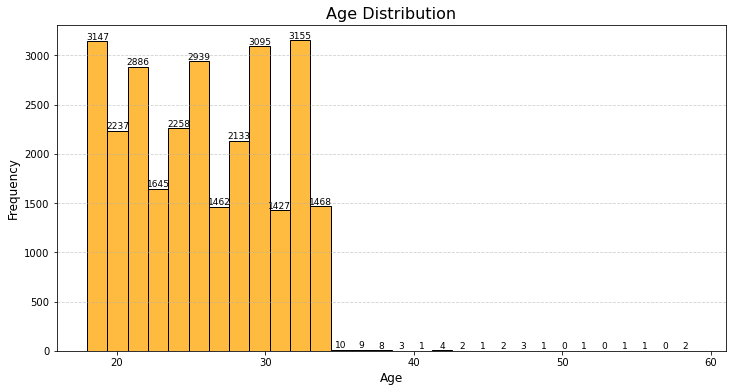

18.0    1587
19.0    1560
20.0    2237
21.0    1726
22.0    1160
23.0    1645
24.0    2258
25.0    1784
26.0    1155
27.0    1462
28.0    2133
29.0    1950
30.0    1145
31.0    1427
32.0    1262
33.0    1893
34.0    1468
35.0      10
36.0       7
37.0       2
38.0       8
39.0       3
41.0       1
42.0       4
43.0       2
44.0       1
46.0       2
48.0       3
49.0       1
51.0       1
54.0       1
56.0       1
58.0       1
59.0       1
Name: Age, dtype: int64


In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=False, color='orange')

# 計算每個年齡的人數
age_counts = df['Age'].value_counts().sort_index()  # 按年齡排序

# 標註數值
bin_counts, bin_edges = np.histogram(df['Age'], bins=30)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
for count, center in zip(bin_counts, bin_centers):
    plt.text(center, count, str(count), ha='center', va='bottom', fontsize=9)

# 設定標題與軸標籤
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# 打印具體的數據表
print(age_counts)


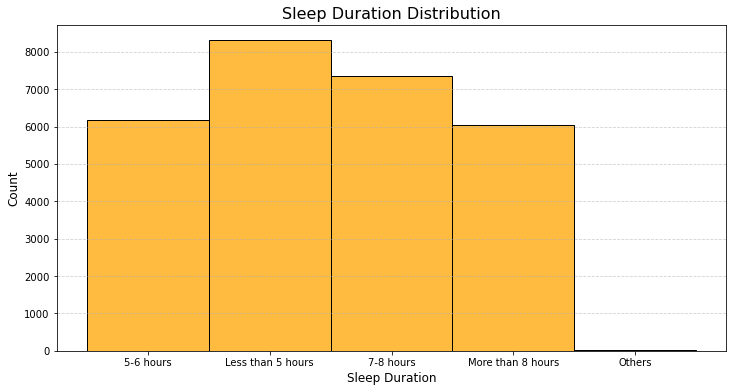

5-6 hours            6183
7-8 hours            7346
Less than 5 hours    8310
More than 8 hours    6044
Others                 18
Name: Sleep Duration, dtype: int64


In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Sleep Duration'], bins=30, kde=False, color='orange')

# 計算每個年齡的人數
sleep_counts = df['Sleep Duration'].value_counts().sort_index()  # 按年齡排序



# 設定標題與軸標籤
plt.title("Sleep Duration Distribution", fontsize=16)
plt.xlabel("Sleep Duration", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# 打印具體的數據表
print(sleep_counts)


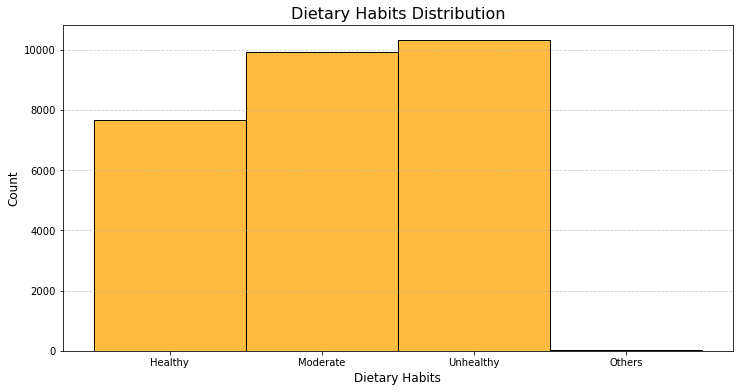

Healthy       7651
Moderate      9921
Others          12
Unhealthy    10317
Name: Dietary Habits, dtype: int64


In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Dietary Habits'], bins=30, kde=False, color='orange')

# 計算每個年齡的人數
dietary_counts = df['Dietary Habits'].value_counts().sort_index()  # 按年齡排序



# 設定標題與軸標籤
plt.title("Dietary Habits Distribution", fontsize=16)
plt.xlabel("Dietary Habits", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# 打印具體的數據表
print(dietary_counts)


Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Bhavna                   2
City                     2
Saanvi                   2
Harsha                   2
ME                       1
Nalini                   1
M.Tech                   1
M

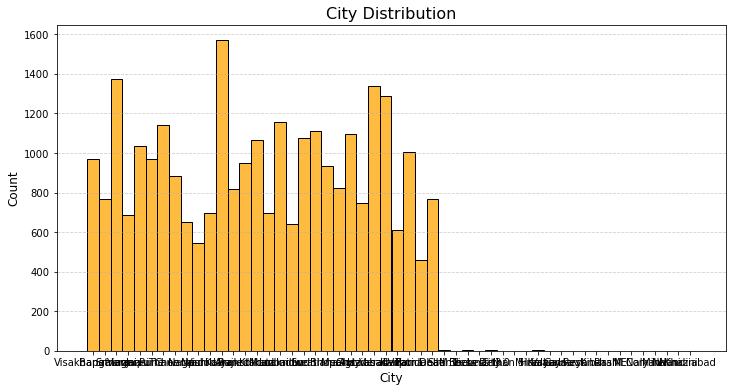

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['City'], bins=30, kde=False, color='orange')


# 設定標題與軸標籤
plt.title("City Distribution", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

df['City'].value_counts()


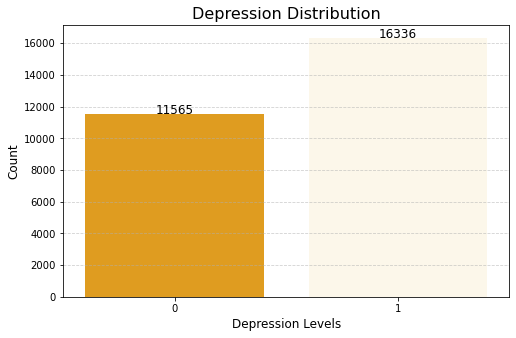

0    11565
1    16336
Name: Depression, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 計算每個類別的數量
depression_counts = df['Depression'].value_counts().sort_index()

# 繪製條形圖
plt.figure(figsize=(8, 5))
sns.barplot(x=depression_counts.index, y=depression_counts.values, palette=['orange', '#fff8e7'])

# 標註數量
for x, y in zip(depression_counts.index, depression_counts.values):
    plt.text(x, y + 1, str(y), ha='center', fontsize=12)

# 設定標題與軸標籤
plt.title("Depression Distribution", fontsize=16)
plt.xlabel("Depression Levels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# 打印具體的數據表
print(depression_counts)


In [10]:
# 篩選出 City 欄位中出現次數大於等於 300 的城市，刪除那些出現次數小於 300 的行。
df=df[df['City'].map(df['City'].value_counts())>=300]
df['City'].value_counts()
print(df['City'].value_counts())
# 刪除 Financial Stress 欄位
df=df.drop(['Financial Stress'],axis=1)

Kalyan           1570
Srinagar         1372
Hyderabad        1340
Vasai-Virar      1290
Lucknow          1155
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1066
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              968
Ahmedabad         951
Bhopal            934
Chennai           885
Meerut            825
Rajkot            816
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          694
Varanasi          685
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: City, dtype: int64


In [11]:
# 篩選出 Profession 欄位中是學生的資料，刪除其他的行。
df['Profession'].value_counts()
df=df[df['Profession']=='Student']
df['Profession'].value_counts()

Student    27844
Name: Profession, dtype: int64

In [12]:
# 篩選出 Age 欄位中<35的資料，刪除其他的行。
df=df[df['Age']<35.0]
df['Age'].value_counts()

24.0    2255
20.0    2235
28.0    2128
29.0    1940
33.0    1892
25.0    1780
21.0    1718
23.0    1640
18.0    1586
19.0    1560
34.0    1466
27.0    1459
31.0    1422
32.0    1258
22.0    1159
26.0    1153
30.0    1144
Name: Age, dtype: int64

In [13]:
# 刪除具有工作壓力者
df=df[df['Work Pressure']==0.0]
df['Work Pressure'].value_counts()

0.0    27793
Name: Work Pressure, dtype: int64

In [14]:
#刪除無學業壓力者
df['Academic Pressure'].value_counts() 
df=df[df['Academic Pressure']!=0.0]
df['Academic Pressure'].value_counts()

3.0    7430
5.0    6268
4.0    5142
1.0    4783
2.0    4165
Name: Academic Pressure, dtype: int64

In [15]:
#刪除學習滿意度為0者
df=df[df['Study Satisfaction']!=0.0]
df['Study Satisfaction'].value_counts()

4.0    6338
2.0    5821
3.0    5796
1.0    5426
5.0    4404
Name: Study Satisfaction, dtype: int64

In [16]:
#刪除睡眠時長為其它者
df=df[df['Sleep Duration']!='Others']
df['Sleep Duration'].value_counts()

Less than 5 hours    8281
7-8 hours            7313
5-6 hours            6152
More than 8 hours    6021
Name: Sleep Duration, dtype: int64

In [17]:
#刪除飲食習慣為其他者
df=df[df['Dietary Habits']!='Others']
df['Dietary Habits'].value_counts()

Unhealthy    10272
Moderate      9868
Healthy       7615
Name: Dietary Habits, dtype: int64

In [18]:
#重新編碼畢業狀況
df['Degree'].value_counts()
graduated = ['B.Ed', 'B.Com', 'B.Arch', 'BCA', 'B.Tech', 'BHM', 'BSc', 'B.Pharm', 'BBA', 'BE', 'BA']
post_graduated = ['MSc', 'MCA', 'M.Tech', 'M.Ed', 'M.Com', 'MBBS', 'LLB', 'M.Pharm', 'MD', 'MBA', 'MA', 'PhD', 'LLM', 'MHM', 'ME']
high_school = ['Class 12', 'Others']


# Iterate over the 'Degree' column and update its values
df['Degree']=df['Degree'].replace(graduated,'graduated')
df['Degree']=df['Degree'].replace(post_graduated,'post-graduated')
df['Degree']=df['Degree'].replace(high_school,'high_school')

In [19]:
df['Age'].astype('int') #轉換資料型態

0        33
1        24
2        31
3        28
4        25
         ..
27896    27
27897    27
27898    31
27899    18
27900    27
Name: Age, Length: 27755, dtype: int32

In [20]:
#將City做One-Hot-Encording
#df=pd.get_dummies(df,columns=['City'],prefix='City_',drop_first=True);

In [21]:
#刪除不要的欄位
df=df.replace({False:0,True:1})
df=df.drop(['id', 'Profession','Work Pressure','Job Satisfaction'],axis=1)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,graduated,Yes,3.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,graduated,No,3.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,graduated,No,9.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,graduated,Yes,4.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,post-graduated,Yes,1.0,No,0


In [22]:
from sklearn.preprocessing import LabelEncoder

# 自動編碼將object轉為數字編碼
categorical_columns = df.select_dtypes(include=['object']).columns

# 儲存每個特徵的編碼資訊
encoding_info = {}

# 將類別型特徵轉換為整數型
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoding_info[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# 打印編碼資訊
for col, mapping in encoding_info.items():
    print(f"Feature: {col}")
    for category, code in mapping.items():
        print(f"  {category} -> {code}")
    print()


Feature: Gender
  Female -> 0
  Male -> 1

Feature: City
  Agra -> 0
  Ahmedabad -> 1
  Bangalore -> 2
  Bhopal -> 3
  Chennai -> 4
  Delhi -> 5
  Faridabad -> 6
  Ghaziabad -> 7
  Hyderabad -> 8
  Indore -> 9
  Jaipur -> 10
  Kalyan -> 11
  Kanpur -> 12
  Kolkata -> 13
  Lucknow -> 14
  Ludhiana -> 15
  Meerut -> 16
  Mumbai -> 17
  Nagpur -> 18
  Nashik -> 19
  Patna -> 20
  Pune -> 21
  Rajkot -> 22
  Srinagar -> 23
  Surat -> 24
  Thane -> 25
  Vadodara -> 26
  Varanasi -> 27
  Vasai-Virar -> 28
  Visakhapatnam -> 29

Feature: Sleep Duration
  5-6 hours -> 0
  7-8 hours -> 1
  Less than 5 hours -> 2
  More than 8 hours -> 3

Feature: Dietary Habits
  Healthy -> 0
  Moderate -> 1
  Unhealthy -> 2

Feature: Degree
  graduated -> 0
  high_school -> 1
  post-graduated -> 2

Feature: Have you ever had suicidal thoughts ?
  No -> 0
  Yes -> 1

Feature: Family History of Mental Illness
  No -> 0
  Yes -> 1



In [23]:
# 計算 0 和 1 的數量
gender_counts = df['Gender'].value_counts()

# 印出結果
print(f"Gender = 0 的數量 (Female): {gender_counts.get(0, 0)}")
print(f"Gender = 1 的數量 (Male): {gender_counts.get(1, 0)}")

Gender = 0 的數量 (Female): 12281
Gender = 1 的數量 (Male): 15474


In [24]:
# 計算 0 和 1 的數量
Sleep_counts = df['Sleep Duration'].value_counts()

# 印出結果
print(f"5-6 hours 的數量: {Sleep_counts.get(0, 0)}")
print(f"7-8 hours 的數量: {Sleep_counts.get(1, 0)}")
print(f"Less than 5 hours 的數量: {Sleep_counts.get(2, 0)}")
print(f"More than 8 hours 的數量: {Sleep_counts.get(3, 0)}")

5-6 hours 的數量: 6149
7-8 hours 的數量: 7310
Less than 5 hours 的數量: 8276
More than 8 hours 的數量: 6020


In [25]:
# 計算 0 和 1 的數量
Dietary_counts = df['Dietary Habits'].value_counts()

# 印出結果
print(f"Healthy 的數量: {Dietary_counts.get(0, 0)}")
print(f"Moderate 的數量: {Dietary_counts.get(1, 0)}")
print(f"Unhealthy 的數量: {Dietary_counts.get(2, 0)}")

Healthy 的數量: 7615
Moderate 的數量: 9868
Unhealthy 的數量: 10272


In [26]:
# 計算 0 和 1 的數量
Degree_counts = df['Degree'].value_counts()

# 印出結果
print(f"high_school 的數量: {Degree_counts.get(1, 0)}")
print(f"graduated 的數量: {Degree_counts.get(0, 0)}")
print(f"post-graduated 的數量: {Degree_counts.get(2, 0)}")

high_school 的數量: 6089
graduated 的數量: 11914
post-graduated 的數量: 9752


In [27]:
# 計算 0 和 1 的數量
thoughts_counts = df['Have you ever had suicidal thoughts ?'].value_counts()

# 印出結果
print(f"No 的數量: {thoughts_counts.get(0, 0)}")
print(f"Yes 的數量: {thoughts_counts.get(1, 0)}")

No 的數量: 10187
Yes 的數量: 17568


In [28]:
#手動重新編碼
#df.loc[df['Family History of Mental Illness']=='Yes','Family History of Mental Illness']=1
#df.loc[df['Family History of Mental Illness']=='No','Family History of Mental Illness']=0
# 確保資料型態為數值型
#df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype(object)

In [29]:
# 計算 0 和 1 的數量
Illness_counts = df['Family History of Mental Illness'].value_counts()

# 印出結果
print(f"No 的數量: {Illness_counts.get(0, 0)}")
print(f"Yes 的數量: {Illness_counts.get(1, 0)}")

No 的數量: 14325
Yes 的數量: 13430


In [30]:
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
0,1,33.0,29,5.0,8.97,2.0,0,0,0,1,3.0,0,1
1,0,24.0,2,2.0,5.90,5.0,0,1,0,0,3.0,1,0
2,1,31.0,23,3.0,7.03,5.0,2,0,0,0,9.0,1,0
3,0,28.0,27,3.0,5.59,2.0,1,1,0,1,4.0,1,1
4,0,25.0,10,4.0,8.13,3.0,0,1,2,1,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0,27.0,24,5.0,5.75,5.0,0,2,1,1,7.0,1,0
27897,1,27.0,15,2.0,9.40,3.0,2,0,2,0,0.0,1,0
27898,1,31.0,6,3.0,6.61,4.0,0,2,2,0,12.0,0,0
27899,0,18.0,15,5.0,6.88,2.0,2,0,1,1,10.0,0,1


In [34]:
# 將特定欄位轉換為類別型
df['Gender'] = df['Gender'].astype('category')
df['City'] = df['City'].astype('category')
df['Sleep Duration'] = df['Sleep Duration'].astype('category')
df['Dietary Habits'] = df['Dietary Habits'].astype('category')
df['Degree'] = df['Degree'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype('category')
df['Depression'] = df['Depression'].astype('category')

# 檢查轉換結果
print(df.info())  # 檢查欄位型態是否為 category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27755 entries, 0 to 27900
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27755 non-null  category
 1   Age                                    27755 non-null  float64 
 2   City                                   27755 non-null  category
 3   Academic Pressure                      27755 non-null  float64 
 4   CGPA                                   27755 non-null  float64 
 5   Study Satisfaction                     27755 non-null  float64 
 6   Sleep Duration                         27755 non-null  category
 7   Dietary Habits                         27755 non-null  category
 8   Degree                                 27755 non-null  category
 9   Have you ever had suicidal thoughts ?  27755 non-null  category
 10  Work/Study Hours                       27755 non-null  flo

In [35]:
df.dtypes

Gender                                   category
Age                                       float64
City                                     category
Academic Pressure                         float64
CGPA                                      float64
Study Satisfaction                        float64
Sleep Duration                           category
Dietary Habits                           category
Degree                                   category
Have you ever had suicidal thoughts ?    category
Work/Study Hours                          float64
Family History of Mental Illness         category
Depression                               category
dtype: object

In [36]:
# 選擇非類別型特徵（數值型特徵）
numerical_columns = df.select_dtypes(include=['number']).columns

# 計算每個數值型特徵的平均值和標準差
mean_df = pd.DataFrame({
    "Feature": numerical_columns,                # 特徵名稱
    "Mean": df[numerical_columns].mean().values,  # 平均值
    "Standard Deviation": df[numerical_columns].std().values  # 標準差
})

# 顯示結果
print(mean_df)


              Feature       Mean  Standard Deviation
0                 Age  25.794163            4.862945
1   Academic Pressure   3.141884            1.380555
2                CGPA   7.658624            1.465798
3  Study Satisfaction   2.944731            1.359966
4    Work/Study Hours   7.162205            3.705719


## 資料可視化

C:\Users\Huici\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Huici\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Huici\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

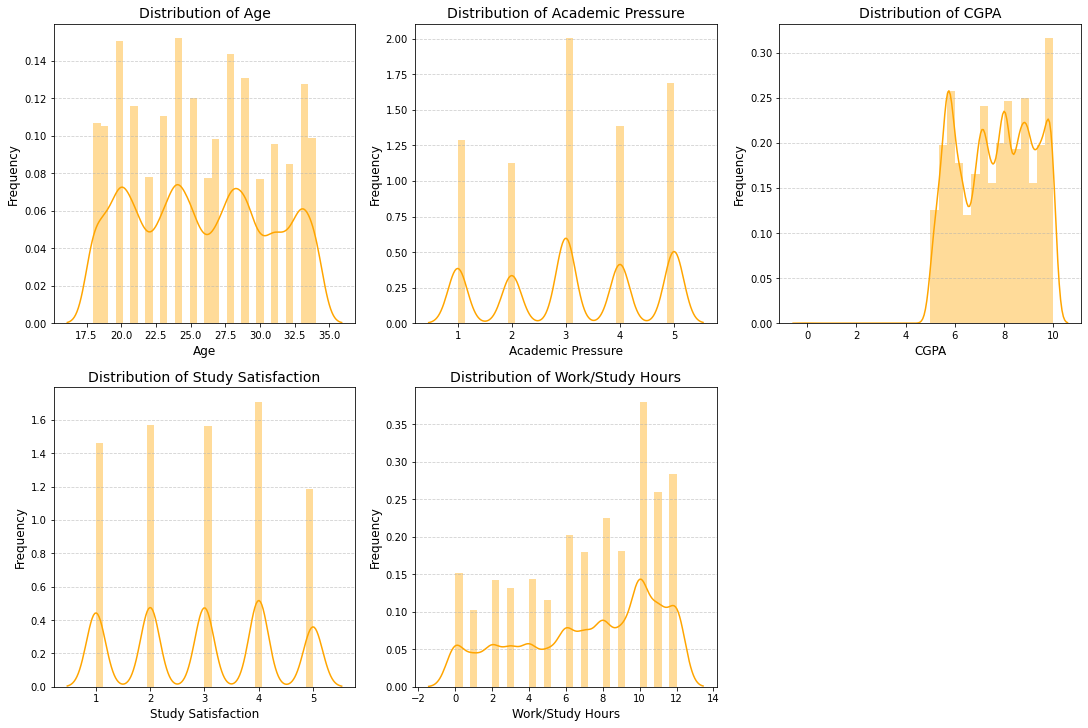

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 選擇數值型欄位
numerical_columns = df.select_dtypes(include=['number']).columns

# 設定子圖的行列數
num_cols = len(numerical_columns)
cols = 3
rows = (num_cols + cols - 1) // cols

# 創建子圖
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)
axes = axes.flatten()

# 繪製每個數值型特徵的分佈圖
for i, col in enumerate(numerical_columns):
    sns.distplot(df[col], kde=True, bins=30, color='orange', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    axes[i].set_ylabel("Frequency", fontsize=12)

# 刪除多餘的子圖
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


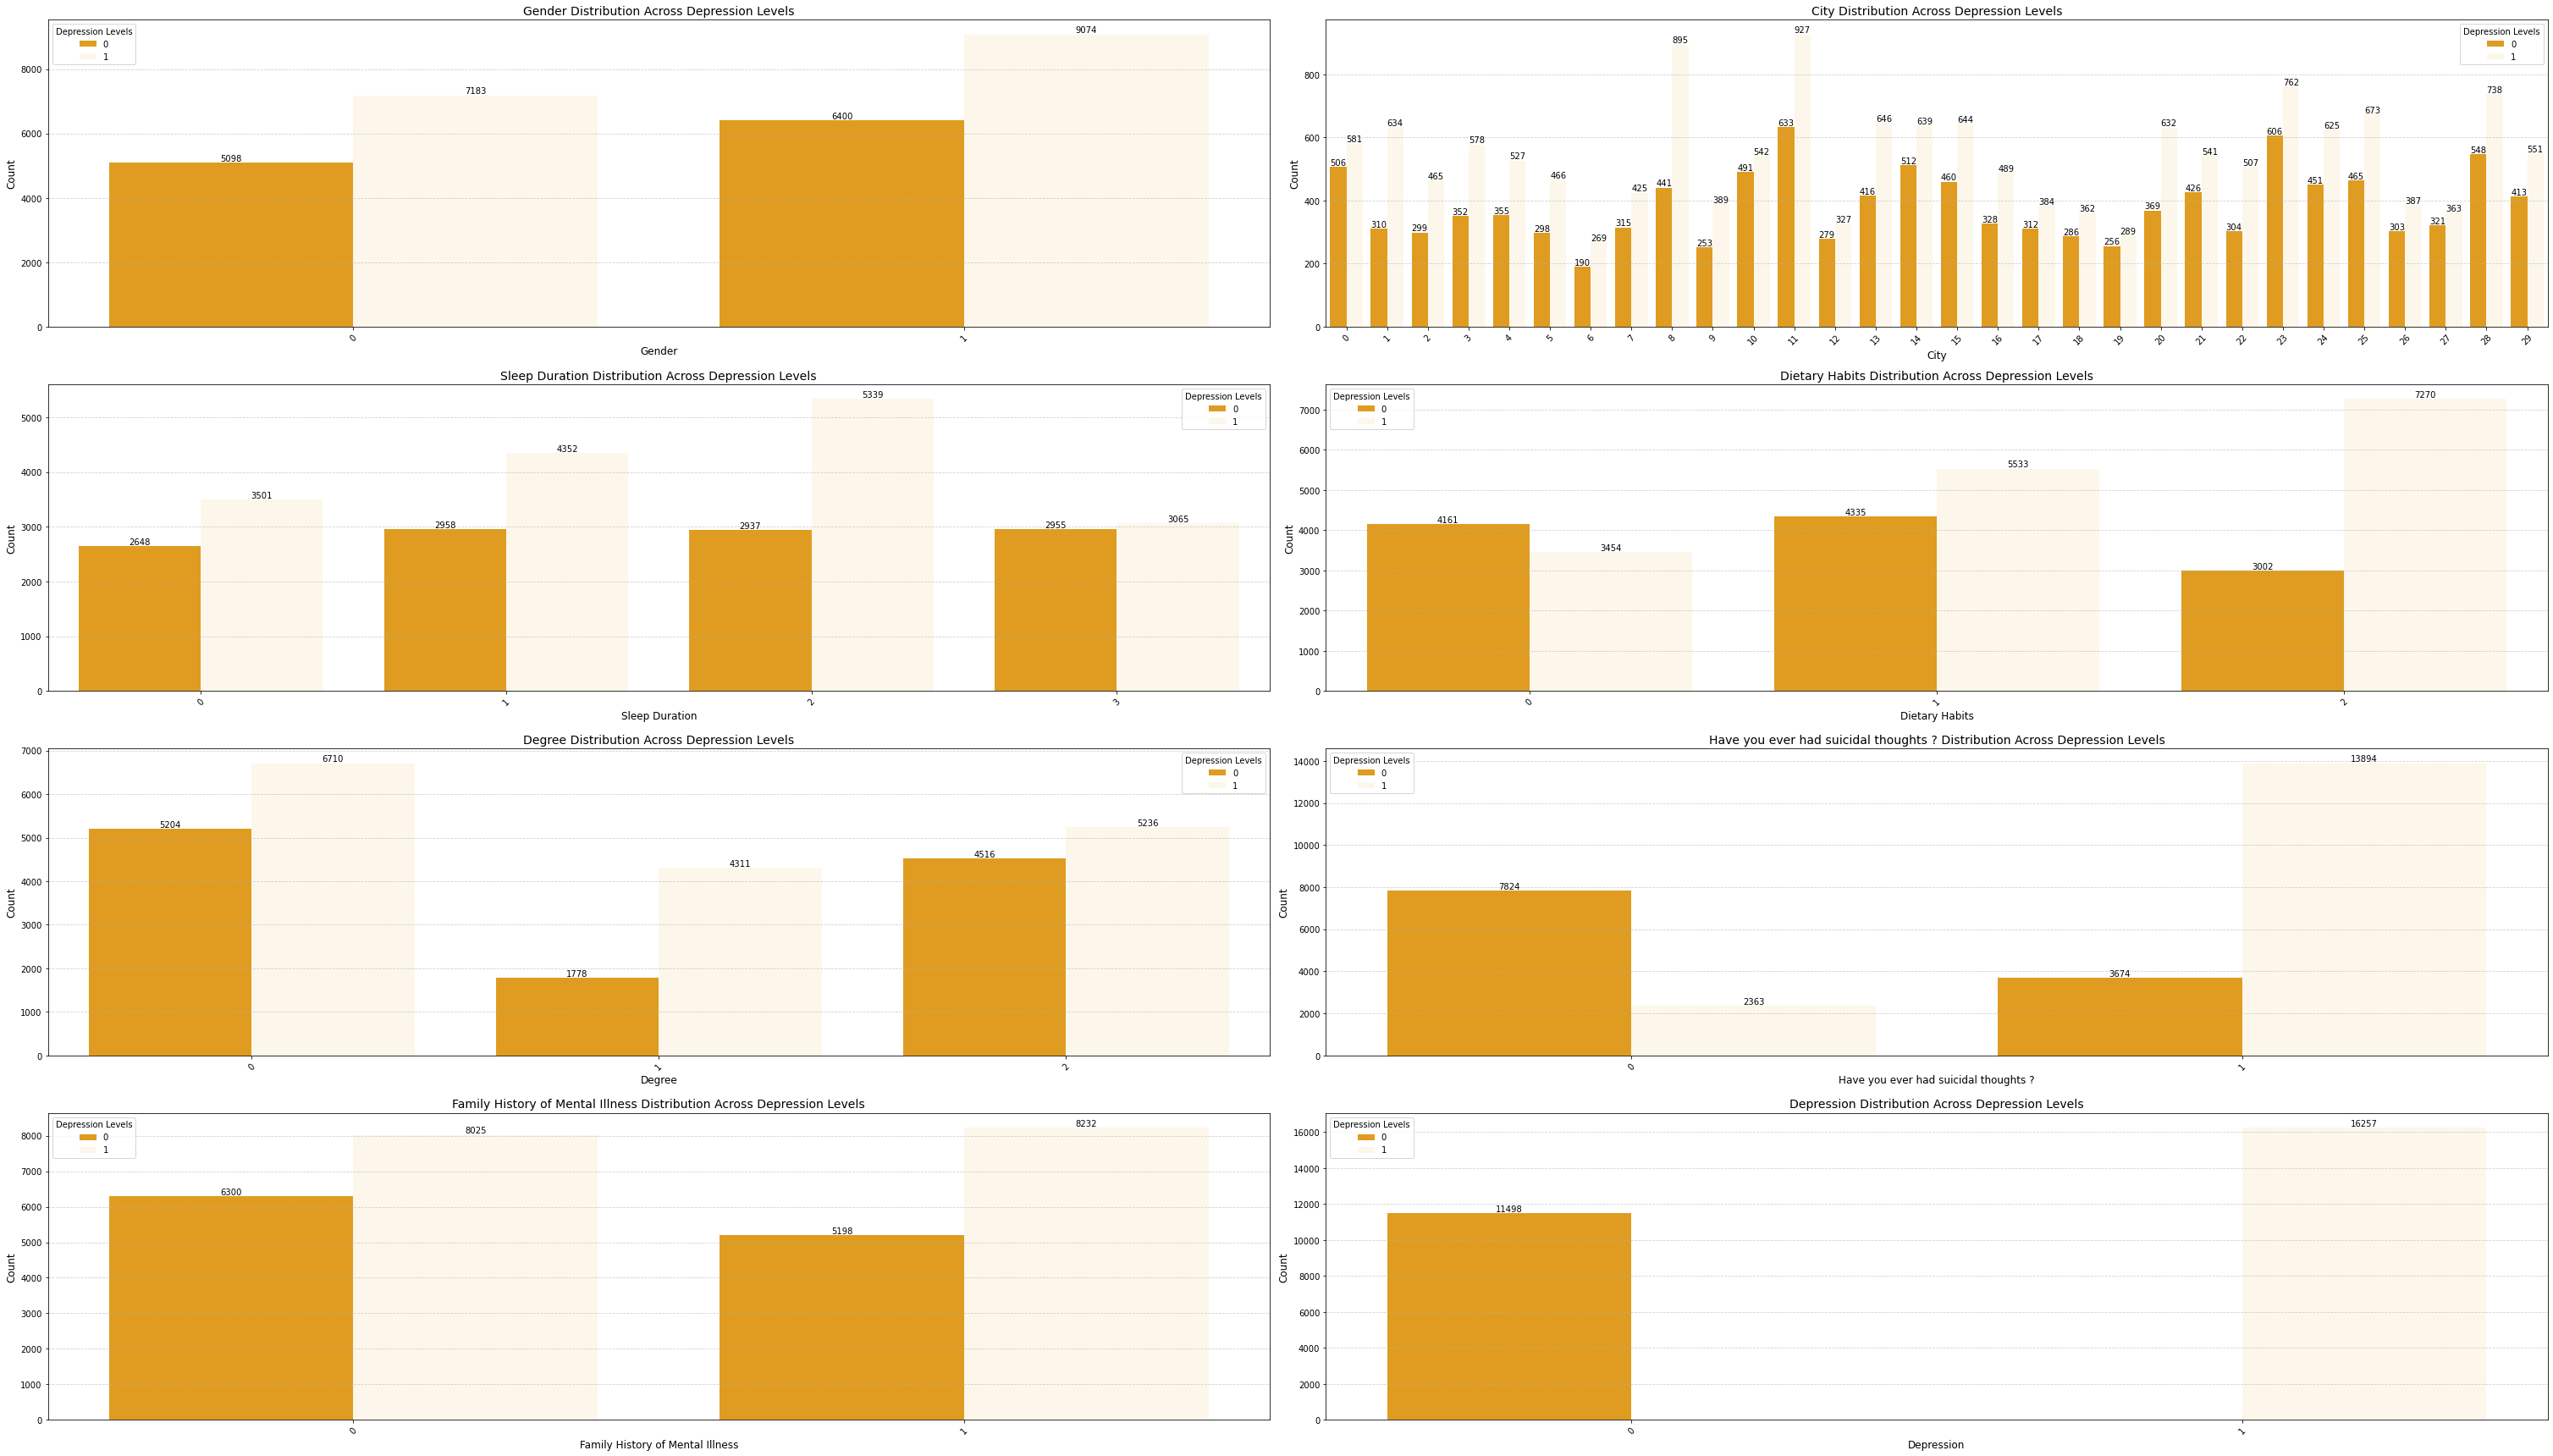

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 選擇類別型欄位
categorical_columns = df.select_dtypes(include=['category']).columns
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols

# 建立子圖
fig, axes = plt.subplots(n_rows, n_cols, figsize=(42, n_rows * 6))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    ax = axes[i]
    
    # 獲取排序順序（按類別數量排序後的固定順序）
    value_order = sorted(df[col].unique())
    
    # 繪製柱狀圖，使用橘色和黃色
    sns.countplot(
        data=df,
        x=col,
        hue='Depression',
        palette=['orange', '#fff8e7'], 
        order=value_order,  # 確保 x 軸類別按照順序排列
        ax=ax
    )
    
    # 設置標題與標籤
    ax.set_title(f'{col} Distribution Across Depression Levels', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.legend(title='Depression Levels', fontsize=10)
    
    # 在每個柱狀圖上標註數值
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height) and height > 0:  # 檢查高度是否為有效數值且大於 0
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=10)

# 刪除多餘的子圖
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


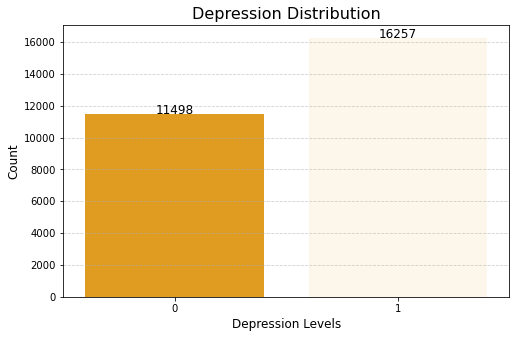

0    11498
1    16257
Name: Depression, dtype: int64


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 計算每個類別的數量
depression_counts = df['Depression'].value_counts().sort_index()

# 繪製條形圖
plt.figure(figsize=(8, 5))
sns.barplot(x=depression_counts.index, y=depression_counts.values, palette=['orange', '#fff8e7'])

# 標註數量
for x, y in zip(depression_counts.index, depression_counts.values):
    plt.text(x, y + 1, str(y), ha='center', fontsize=12)

# 設定標題與軸標籤
plt.title("Depression Distribution", fontsize=16)
plt.xlabel("Depression Levels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

# 打印具體的數據表
print(depression_counts)

## 資料切割

In [43]:
# 將 df 中所有 object 型欄位轉換為 int
for col in df.select_dtypes(include=['object']).columns:
    df[col], _ = pd.factorize(df[col])

In [44]:
import pandas as pd

# 假設檔案已讀取到 DataFrame df
# 確認 'Depression' 欄位存在
if 'Depression' not in df.columns:
    raise ValueError("The 'Depression' column does not exist in the DataFrame!")

# 分離資料
normal = df[df['Depression'] == 0]  # 'Depression' 為 0 的資料
block = df[df['Depression'] == 1]  # 'Depression' 為 1 的資料

# 將資料分別存成檔案
normal.to_csv('normal.csv', index=False)  # 儲存 normal 資料
block.to_csv('block.csv', index=False)  # 儲存 block 資料

# 顯示分離結果資訊
print(f"Normal data saved with {len(normal)} rows.")
print(f"Block data saved with {len(block)} rows.")


Normal data saved with 11498 rows.
Block data saved with 16257 rows.


In [45]:
#資料分割(80-20先切割再合併)

normal_train, normal_test = train_test_split(normal, train_size=0.8)
block_train, block_test = train_test_split(block, train_size=0.8)
train_data = pd.concat([block_train,normal_train], axis = 0)
test_data = pd.concat([block_test,normal_test], axis = 0)

In [46]:
normal_test

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
2390,1,29.0,15,1.0,8.04,2.0,1,2,2,0,11.0,0,0
9563,0,25.0,26,2.0,7.94,2.0,1,0,0,0,7.0,0,0
14163,0,21.0,11,1.0,5.32,1.0,2,1,0,0,12.0,1,0
1478,1,33.0,14,1.0,9.41,3.0,2,0,2,0,7.0,1,0
3940,0,25.0,9,3.0,6.47,3.0,3,2,0,1,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10876,0,34.0,10,5.0,8.90,4.0,0,1,0,0,11.0,1,0
26844,1,23.0,23,1.0,7.15,2.0,1,0,2,0,8.0,0,0
2661,1,21.0,14,5.0,5.45,4.0,3,1,2,0,1.0,1,0
10130,1,34.0,28,2.0,5.12,5.0,1,2,2,0,6.0,0,0


In [47]:
block_test

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
27851,0,25.0,27,3.0,5.79,1.0,3,2,0,1,3.0,0,1
18355,1,19.0,1,3.0,5.38,5.0,3,0,1,0,10.0,0,1
6823,0,20.0,25,4.0,9.89,2.0,1,2,1,1,10.0,1,1
11879,0,25.0,3,4.0,9.96,5.0,1,2,2,1,9.0,0,1
18094,1,18.0,17,5.0,9.90,4.0,2,1,1,1,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0,26.0,24,5.0,9.93,1.0,0,0,0,1,6.0,1,1
16478,1,29.0,16,2.0,5.27,5.0,2,1,0,1,10.0,0,1
4898,1,33.0,14,4.0,8.56,5.0,3,0,0,1,0.0,0,1
19599,0,29.0,20,5.0,8.90,2.0,3,2,2,1,8.0,1,1


In [48]:
block.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [49]:
#設定input、output
train_X = train_data[['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Family History of Mental Illness']]
train_y = train_data[['Depression']]

test_X = test_data[['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Family History of Mental Illness']]
test_y = test_data[['Depression']]

data_X = df[['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Family History of Mental Illness']]
data_y = df[['Depression']]

In [50]:
train_data.reset_index(inplace=True)


In [51]:
print("訓練集樣本數：", len(train_X))
print("測試集樣本數：", len(test_X))


訓練集樣本數： 22203
測試集樣本數： 5552


### 建立結果蒐集frame

In [52]:
#Data Frame 表頭

train_df = pd.DataFrame(columns=['Model name','dataset','accuarcy','precision','recall','f1-score','auc'])
test_df = pd.DataFrame(columns=['Model name','dataset','accuarcy','precision','recall','f1-score','auc'])

### 資料儲存

In [53]:
if not os.path.isdir(path+'train'):  # 確認儲存檔案位置 若沒有的話 則新建檔案
    os.makedirs(path+'train')

In [54]:
# train 預測結果

def train_result(pred, name, train_auc):
    global train_df
    accuracy = round(metrics.accuracy_score(train_y, pred), 2)
    precision = round(metrics.precision_score(train_y, pred), 2)
    recall = round(metrics.recall_score(train_y, pred), 2)
    f1_score_value = round(metrics.f1_score(train_y, pred), 2)
    auc_curve = round(train_auc, 2)
    
    
    df = pd.DataFrame({
        'Model name': name,
        'dataset': 'train',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1_score_value,
        'auc': auc_curve
    }, index=[0])
    
    
    train_df = pd.concat([train_df, df], axis=0, ignore_index=True)
    
    # Save the results to a CSV file
    train_df.to_csv(path + "\\train\\" + " train.csv")
    
    return train_df


In [55]:
if not os.path.isdir(path+'test'):  # 確認儲存檔案位置 若沒有的話 則新建檔案
    os.makedirs(path+'test')

In [56]:
# test 預測結果
def test_result(pred, name, test_auc):
    global test_df
    accuracy = round(metrics.accuracy_score(test_y, pred), 2)
    precision = round(metrics.precision_score(test_y, pred), 2)
    recall = round(metrics.recall_score(test_y, pred), 2)
    f1_score_value = round(metrics.f1_score(test_y, pred), 2)
    auc_curve = round(test_auc, 2)
    
    
    
    df = pd.DataFrame({
        'Model name': name,
        'dataset': 'test',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1-score': f1_score_value,
        'auc': auc_curve
        
    }, index=[0])
    
    
    test_df = pd.concat([test_df, df], axis=0, ignore_index=True)
    
    # Save the results to a CSV file
    test_df.to_csv(path + "\\test\\"  + " test.csv")
    
    return test_df
    

## LightGBM

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.517116	eval's binary_logloss: 0.533298
[20]	train's binary_logloss: 0.43894	eval's binary_logloss: 0.466404
[30]	train's binary_logloss: 0.393104	eval's binary_logloss: 0.429437
[40]	train's binary_logloss: 0.365803	eval's binary_logloss: 0.409141
[50]	train's binary_logloss: 0.347721	eval's binary_logloss: 0.397808
[60]	train's binary_logloss: 0.335864	eval's binary_logloss: 0.391296
[70]	train's binary_logloss: 0.326525	eval's binary_logloss: 0.38797
[80]	train's binary_logloss: 0.319832	eval's binary_logloss: 0.385044
[90]	train's binary_logloss: 0.314198	eval's binary_logloss: 0.383904
[100]	train's binary_logloss: 0.309206	eval's binary_logloss: 0.383355
[110]	train's binary_logloss: 0.304896	eval's binary_logloss: 0.382454
[120]	train's binary_logloss: 0.301416	eval's binary_logloss: 0.381581
[130]	train's binary_logloss: 0.298299	eval's binary_logloss: 0.382114
[140]	train's binary_loglos

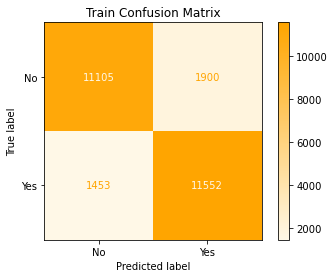

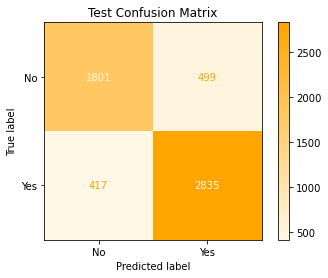

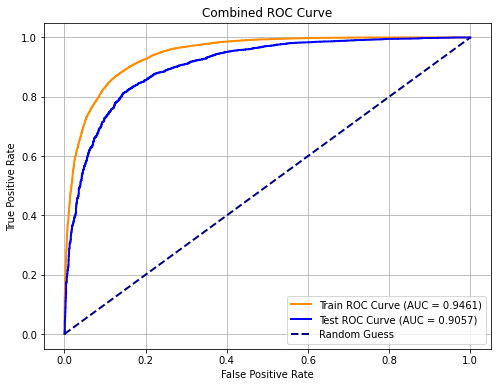


===== Learning Curve =====


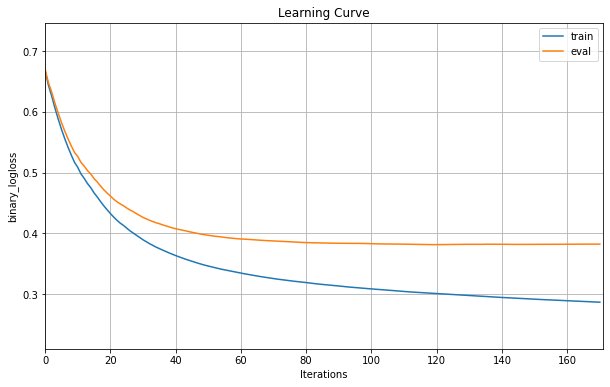

In [64]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

# 使用 SMOTE 平衡訓練資料
smote = SMOTE(random_state=42)
train_X_resampled, train_y_resampled = smote.fit_resample(train_X, train_y)

# 將標籤轉換為 int 型別
train_y_resampled = train_y_resampled.astype(int)
test_y = test_y.astype(int)

# 指定類別型特徵的索引（只讀取類型為 category 的特徵）
categorical_feature_indices = train_X_resampled.select_dtypes(include=['category']).columns.tolist()

# 調整成 LightGBM 需要的 Dataset 格式，並指定類別型特徵
lgb_train = lgb.Dataset(train_X_resampled, label=train_y_resampled, categorical_feature=categorical_feature_indices)
lgb_eval = lgb.Dataset(test_X, label=test_y, reference=lgb_train)

# 設定超參數（未設定者採預設）
params = {
    'objective': 'binary',  # 二元分類
    'metric': 'binary_logloss',  # 評估指標
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'learning_rate': 0.05,  # 學習率
    'num_leaves': 31,  # 葉子節點數
    'max_depth': -1,  # 無限制樹深度
    'feature_fraction': 0.8,  # 特徵隨機抽樣比例
    'bagging_fraction': 0.8,  # 資料隨機抽樣比例
    'bagging_freq': 5,  # 每 5 次迭代進行一次隨機抽樣
    'verbose': -1,  # 禁止輸出過多訊息
    'random_state': 42  # 隨機種子
}

# 設置早停條件和記錄評估結果
evals_result = {}
callbacks = [
    lgb.early_stopping(stopping_rounds=50),  # 如果模型在連續 50 次迭代中，驗證集的評估指標沒有改善，訓練將提前結束。
    lgb.log_evaluation(period=10),  # 每 10 次迭代打印一次訓練過程的評估指標。
    lgb.record_evaluation(evals_result)  # 記錄評估結果
]

# 訓練模型
gbm = lgb.train(
    params=params,  # 帶入超參數設定
    train_set=lgb_train,  # 選擇訓練資料
    valid_sets=[lgb_train, lgb_eval],
    valid_names=["train", "eval"],
    num_boost_round=1000,  # 控制總共要建立 1000 棵決策樹
    callbacks=callbacks
)

# 預測
train_pred_prob = gbm.predict(train_X_resampled)
train_pred = (train_pred_prob > 0.5).astype(int)

test_pred_prob = gbm.predict(test_X)
test_pred = (test_pred_prob > 0.5).astype(int)

# 評估指標
def evaluate_results(y_true, y_pred, y_pred_prob, dataset_name="Dataset"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred_prob)
    print(f"\n===== {dataset_name} Evaluation =====")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc_score:.4f}")
    return accuracy, precision, recall, f1, auc_score

# 訓練集評估
evaluate_results(train_y_resampled, train_pred, train_pred_prob, "Train")

# 測試集評估
evaluate_results(test_y, test_pred, test_pred_prob, "Test")

# 繪製混淆矩陣
def plot_confusion_matrix(y_true, y_pred, dataset_name="Dataset"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No", "Yes"])
    
    # 自定義顏色
    cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["#fff8e7", "#ffa500"])
    
    disp.plot(cmap=cmap)  # 使用自定義的橙黃色
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.show()

# 繪製訓練集和測試集的混淆矩陣
plot_confusion_matrix(train_y_resampled, train_pred, "Train")
plot_confusion_matrix(test_y, test_pred, "Test")


# 繪製 ROC 曲線（Train 和 Test）
def plot_combined_roc_curve(y_train_true, y_train_pred_prob, y_test_true, y_test_pred_prob):
    # 計算 Train ROC 曲線
    fpr_train, tpr_train, _ = roc_curve(y_train_true, y_train_pred_prob)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    # 計算 Test ROC 曲線
    fpr_test, tpr_test, _ = roc_curve(y_test_true, y_test_pred_prob)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # 繪圖
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color="darkorange", lw=2, label=f"Train ROC Curve (AUC = {roc_auc_train:.4f})")
    plt.plot(fpr_test, tpr_test, color="blue", lw=2, label=f"Test ROC Curve (AUC = {roc_auc_test:.4f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Combined ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# 調用函數繪製 ROC 曲線
plot_combined_roc_curve(train_y_resampled, train_pred_prob, test_y, test_pred_prob)


# 繪製學習曲線
print("\n===== Learning Curve =====")
lgb.plot_metric(evals_result, metric="binary_logloss", figsize=(10, 6))
plt.title("Learning Curve")
plt.show()



===== SHAP Analysis =====

===== Train SHAP Analysis =====


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


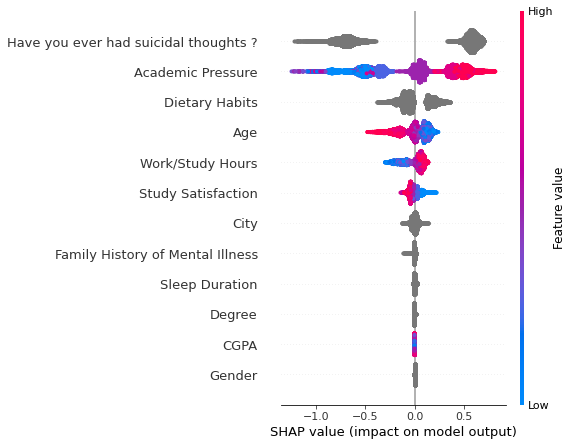

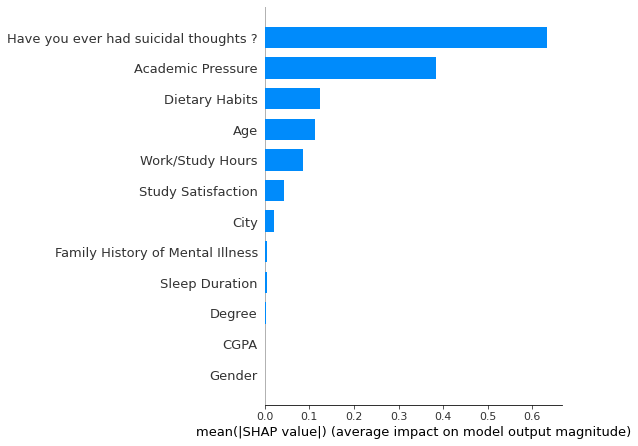


===== SHAP Dependence Plot for Gender =====


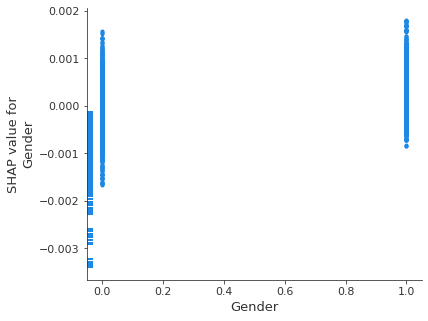


===== SHAP Dependence Plot for City =====


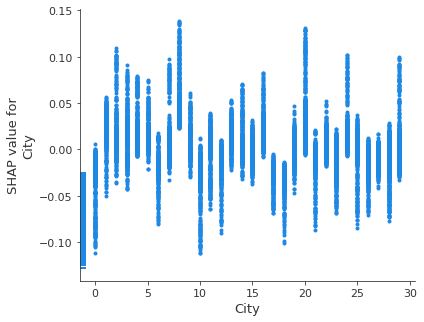


===== SHAP Dependence Plot for Sleep Duration =====


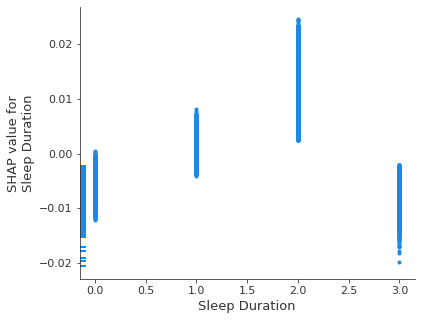


===== SHAP Dependence Plot for Dietary Habits =====


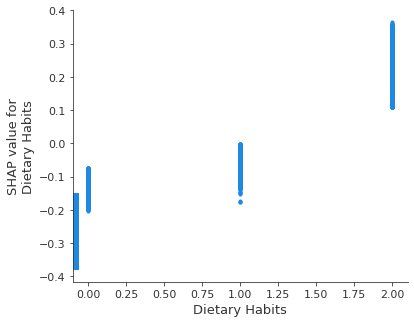


===== SHAP Dependence Plot for Degree =====


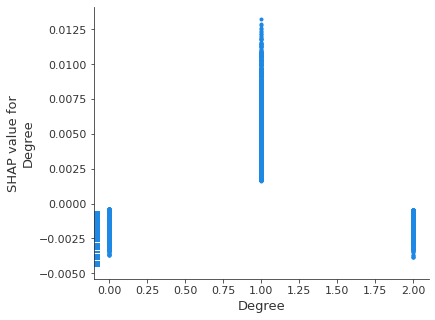


===== SHAP Dependence Plot for Have you ever had suicidal thoughts ? =====


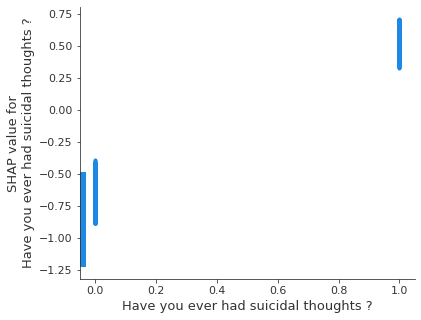


===== SHAP Dependence Plot for Family History of Mental Illness =====


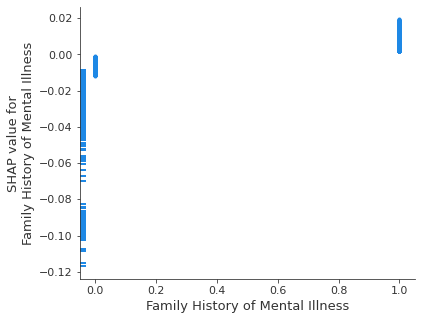


===== Test SHAP Analysis =====


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


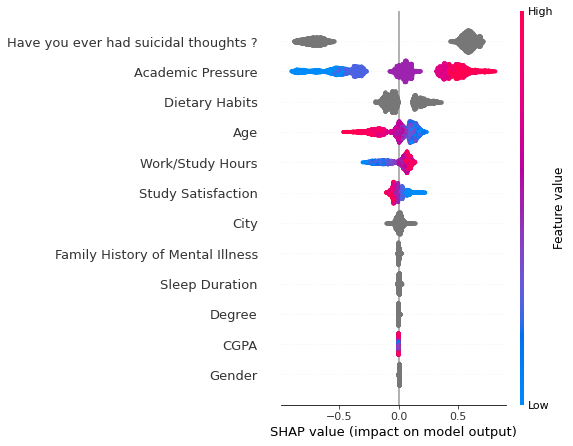

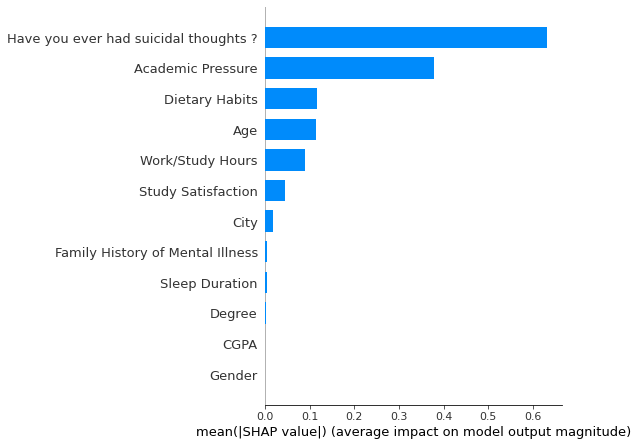


===== SHAP Dependence Plot for Gender =====


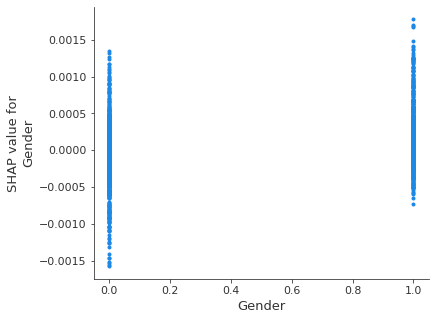


===== SHAP Dependence Plot for City =====


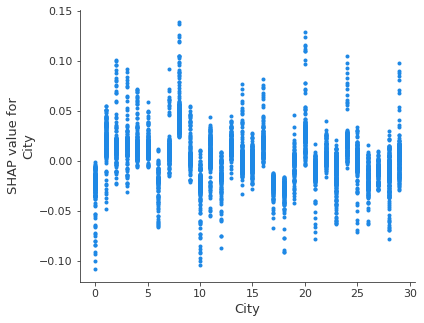


===== SHAP Dependence Plot for Sleep Duration =====


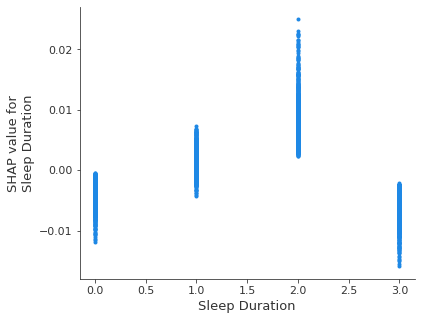


===== SHAP Dependence Plot for Dietary Habits =====


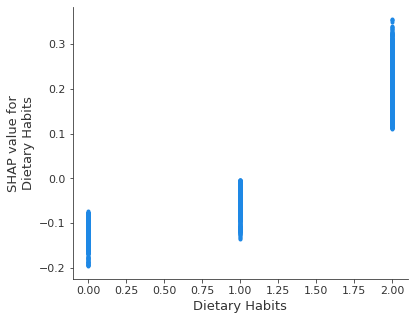


===== SHAP Dependence Plot for Degree =====


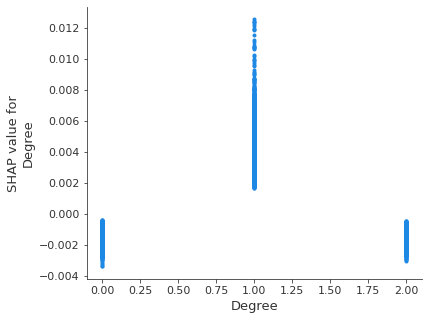


===== SHAP Dependence Plot for Have you ever had suicidal thoughts ? =====


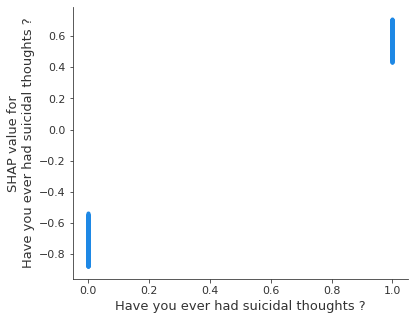


===== SHAP Dependence Plot for Family History of Mental Illness =====


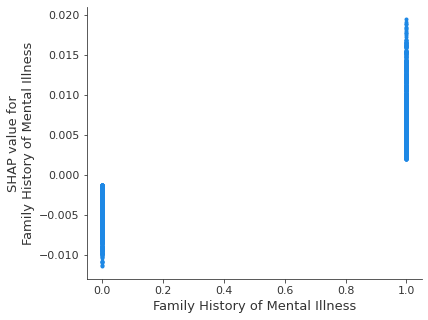

In [61]:
# SHAP 分析
print("\n===== SHAP Analysis =====")
explainer = shap.TreeExplainer(gbm)

# 找出類別型特徵
categorical_features = train_X_resampled.select_dtypes(include='category').columns

# 訓練集 SHAP 分析
print("\n===== Train SHAP Analysis =====")
train_shap_values = explainer.shap_values(train_X_resampled)

# SHAP Summary Plot（散布圖）
shap.summary_plot(train_shap_values[1], train_X_resampled, feature_names=train_X_resampled.columns)
plt.show()

# SHAP Summary Plot（條形圖）
shap.summary_plot(train_shap_values[1], train_X_resampled, plot_type="bar", feature_names=train_X_resampled.columns)
plt.show()

# 對每個類別型特徵繪製 SHAP Dependence Plot
for feature in categorical_features:
    print(f"\n===== SHAP Dependence Plot for {feature} =====")
    shap.dependence_plot(feature, train_shap_values[1], train_X_resampled, interaction_index=None)
    plt.show()

# 測試集 SHAP 分析
print("\n===== Test SHAP Analysis =====")
test_shap_values = explainer.shap_values(test_X)

# Test SHAP Summary Plot（散布圖）
shap.summary_plot(test_shap_values[1], test_X, feature_names=test_X.columns)
plt.show()

# Test SHAP Summary Plot（條形圖）
shap.summary_plot(test_shap_values[1], test_X, plot_type="bar", feature_names=test_X.columns)
plt.show()

# 對測試集的每個類別型特徵繪製 SHAP Dependence Plot
for feature in categorical_features:
    print(f"\n===== SHAP Dependence Plot for {feature} =====")
    shap.dependence_plot(feature, test_shap_values[1], test_X, interaction_index=None)
    plt.show()


### 10-fold


===== Fold 1 =====


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.517323	eval's binary_logloss: 0.531874
[20]	train's binary_logloss: 0.439303	eval's binary_logloss: 0.464784
[30]	train's binary_logloss: 0.393279	eval's binary_logloss: 0.42724
[40]	train's binary_logloss: 0.366453	eval's binary_logloss: 0.40701
[50]	train's binary_logloss: 0.348893	eval's binary_logloss: 0.395476
[60]	train's binary_logloss: 0.336705	eval's binary_logloss: 0.389205
[70]	train's binary_logloss: 0.327733	eval's binary_logloss: 0.385108
[80]	train's binary_logloss: 0.320787	eval's binary_logloss: 0.383008
[90]	train's binary_logloss: 0.31539	eval's binary_logloss: 0.38163
[100]	train's binary_logloss: 0.310951	eval's binary_logloss: 0.380705
[110]	train's binary_logloss: 0.307065	eval's binary_logloss: 0.379945
[120]	train's binary_logloss: 0.30377	eval's binary_logloss: 0.37939
[130]	train's binary_logloss: 0.300682	eval's binary_logloss: 0.379575
[140]	train's binary_logloss: 0

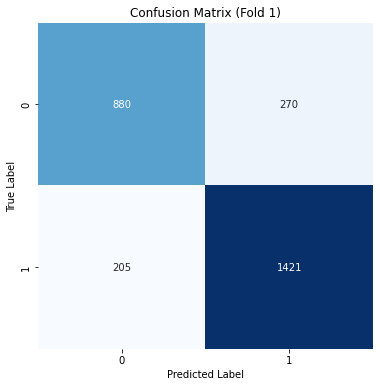

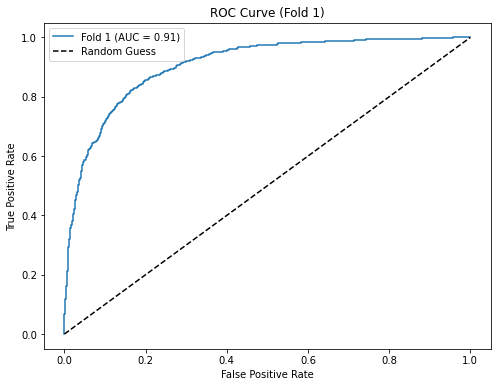


===== Fold 2 =====


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.51788	eval's binary_logloss: 0.530193
[20]	train's binary_logloss: 0.439723	eval's binary_logloss: 0.463301
[30]	train's binary_logloss: 0.394528	eval's binary_logloss: 0.424925
[40]	train's binary_logloss: 0.366891	eval's binary_logloss: 0.403889
[50]	train's binary_logloss: 0.349722	eval's binary_logloss: 0.392407
[60]	train's binary_logloss: 0.337669	eval's binary_logloss: 0.386242
[70]	train's binary_logloss: 0.328491	eval's binary_logloss: 0.382981
[80]	train's binary_logloss: 0.321556	eval's binary_logloss: 0.380502
[90]	train's binary_logloss: 0.31583	eval's binary_logloss: 0.379064
[100]	train's binary_logloss: 0.311405	eval's binary_logloss: 0.378657
[110]	train's binary_logloss: 0.307301	eval's binary_logloss: 0.378254
[120]	train's binary_logloss: 0.304014	eval's binary_logloss: 0.377971
[130]	train's binary_logloss: 0.300868	eval's binary_logloss: 0.377772
[140]	train's binary_loglos

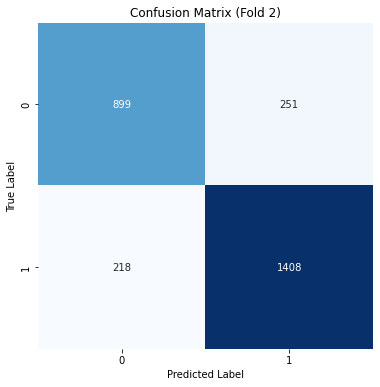

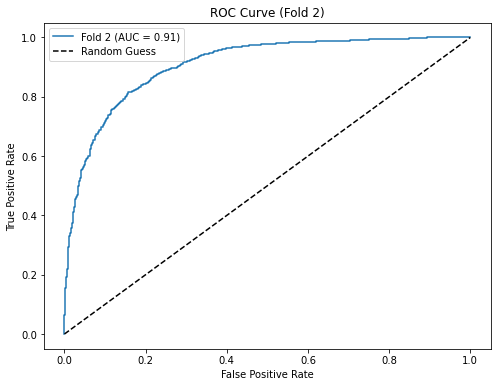


===== Fold 3 =====


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.516375	eval's binary_logloss: 0.535088
[20]	train's binary_logloss: 0.438443	eval's binary_logloss: 0.468985
[30]	train's binary_logloss: 0.393415	eval's binary_logloss: 0.434035
[40]	train's binary_logloss: 0.365857	eval's binary_logloss: 0.414368
[50]	train's binary_logloss: 0.34852	eval's binary_logloss: 0.403779
[60]	train's binary_logloss: 0.336701	eval's binary_logloss: 0.398139
[70]	train's binary_logloss: 0.327386	eval's binary_logloss: 0.394457
[80]	train's binary_logloss: 0.320294	eval's binary_logloss: 0.391636
[90]	train's binary_logloss: 0.314791	eval's binary_logloss: 0.389537
[100]	train's binary_logloss: 0.310034	eval's binary_logloss: 0.388952
[110]	train's binary_logloss: 0.306081	eval's binary_logloss: 0.388559
[120]	train's binary_logloss: 0.302645	eval's binary_logloss: 0.387853
[130]	train's binary_logloss: 0.299592	eval's binary_logloss: 0.387545
[140]	train's binary_loglo

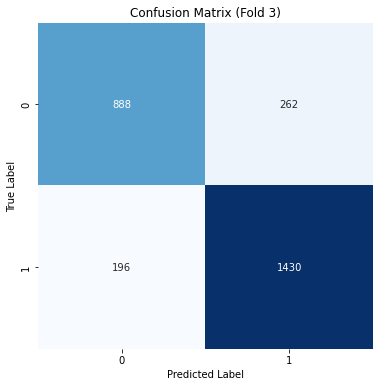

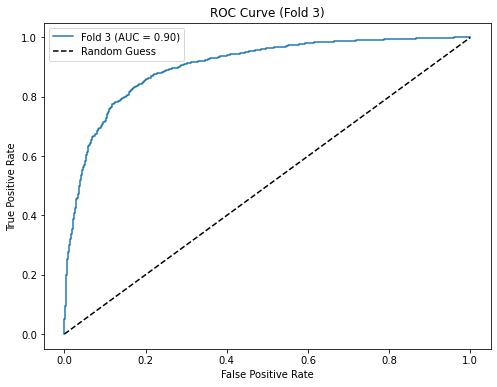


===== Fold 4 =====


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.517297	eval's binary_logloss: 0.533565
[20]	train's binary_logloss: 0.439581	eval's binary_logloss: 0.467158
[30]	train's binary_logloss: 0.393883	eval's binary_logloss: 0.430108
[40]	train's binary_logloss: 0.366303	eval's binary_logloss: 0.410325
[50]	train's binary_logloss: 0.349017	eval's binary_logloss: 0.399053
[60]	train's binary_logloss: 0.337244	eval's binary_logloss: 0.392598
[70]	train's binary_logloss: 0.328369	eval's binary_logloss: 0.388608
[80]	train's binary_logloss: 0.321321	eval's binary_logloss: 0.386101
[90]	train's binary_logloss: 0.315577	eval's binary_logloss: 0.384314
[100]	train's binary_logloss: 0.311028	eval's binary_logloss: 0.383312
[110]	train's binary_logloss: 0.307141	eval's binary_logloss: 0.382249
[120]	train's binary_logloss: 0.303705	eval's binary_logloss: 0.381729
[130]	train's binary_logloss: 0.300776	eval's binary_logloss: 0.382076
[140]	train's binary_logl

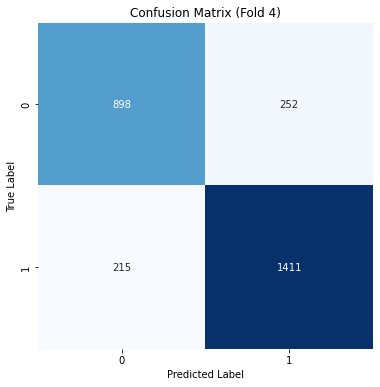

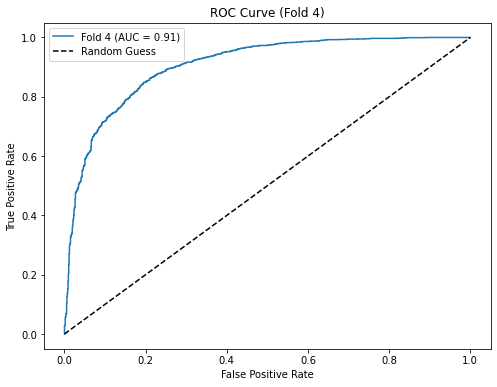


===== Fold 5 =====


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.515162	eval's binary_logloss: 0.544963
[20]	train's binary_logloss: 0.436032	eval's binary_logloss: 0.483679
[30]	train's binary_logloss: 0.390866	eval's binary_logloss: 0.452203
[40]	train's binary_logloss: 0.363521	eval's binary_logloss: 0.434543
[50]	train's binary_logloss: 0.34622	eval's binary_logloss: 0.424651
[60]	train's binary_logloss: 0.33447	eval's binary_logloss: 0.419038
[70]	train's binary_logloss: 0.325681	eval's binary_logloss: 0.41568
[80]	train's binary_logloss: 0.318615	eval's binary_logloss: 0.412663
[90]	train's binary_logloss: 0.313159	eval's binary_logloss: 0.410519
[100]	train's binary_logloss: 0.308756	eval's binary_logloss: 0.41
[110]	train's binary_logloss: 0.304711	eval's binary_logloss: 0.409349
[120]	train's binary_logloss: 0.30085	eval's binary_logloss: 0.409034
[130]	train's binary_logloss: 0.29776	eval's binary_logloss: 0.408769
[140]	train's binary_logloss: 0.29

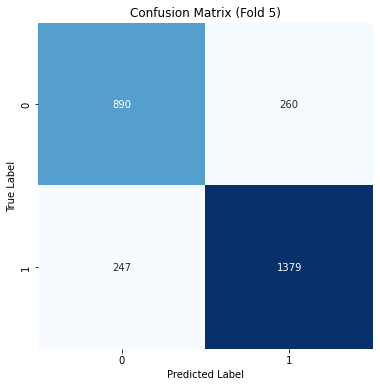

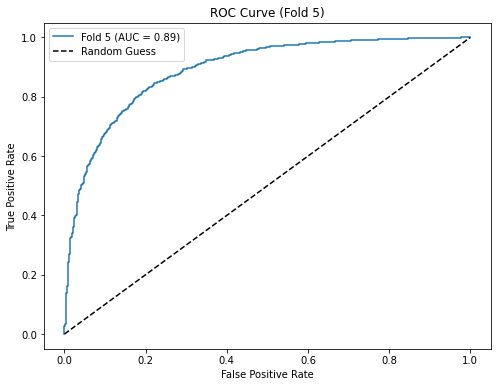


===== Fold 6 =====


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.51641	eval's binary_logloss: 0.533969
[20]	train's binary_logloss: 0.438467	eval's binary_logloss: 0.468618
[30]	train's binary_logloss: 0.392599	eval's binary_logloss: 0.431846
[40]	train's binary_logloss: 0.365589	eval's binary_logloss: 0.413044
[50]	train's binary_logloss: 0.348488	eval's binary_logloss: 0.40129
[60]	train's binary_logloss: 0.337093	eval's binary_logloss: 0.395722
[70]	train's binary_logloss: 0.327937	eval's binary_logloss: 0.391457
[80]	train's binary_logloss: 0.320771	eval's binary_logloss: 0.388487
[90]	train's binary_logloss: 0.31483	eval's binary_logloss: 0.387025
[100]	train's binary_logloss: 0.310176	eval's binary_logloss: 0.385756
[110]	train's binary_logloss: 0.306253	eval's binary_logloss: 0.384612
[120]	train's binary_logloss: 0.302844	eval's binary_logloss: 0.384403
[130]	train's binary_logloss: 0.299708	eval's binary_logloss: 0.384362
[140]	train's binary_logloss

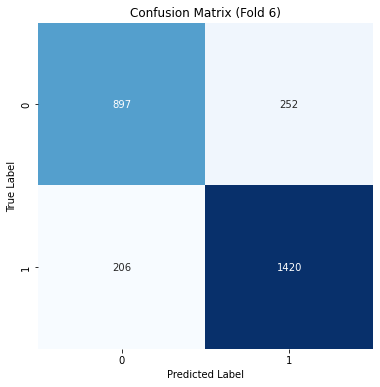

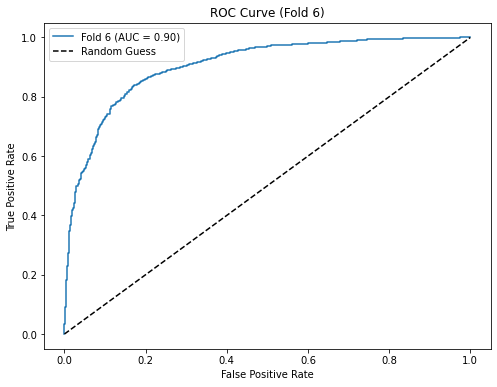


===== Fold 7 =====


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.516408	eval's binary_logloss: 0.538339
[20]	train's binary_logloss: 0.438144	eval's binary_logloss: 0.473819
[30]	train's binary_logloss: 0.392373	eval's binary_logloss: 0.43926
[40]	train's binary_logloss: 0.364945	eval's binary_logloss: 0.42007
[50]	train's binary_logloss: 0.3476	eval's binary_logloss: 0.409123
[60]	train's binary_logloss: 0.335585	eval's binary_logloss: 0.402942
[70]	train's binary_logloss: 0.326497	eval's binary_logloss: 0.398952
[80]	train's binary_logloss: 0.319486	eval's binary_logloss: 0.396818
[90]	train's binary_logloss: 0.313881	eval's binary_logloss: 0.39543
[100]	train's binary_logloss: 0.30945	eval's binary_logloss: 0.394644
[110]	train's binary_logloss: 0.305304	eval's binary_logloss: 0.394011
[120]	train's binary_logloss: 0.301756	eval's binary_logloss: 0.393766
[130]	train's binary_logloss: 0.298783	eval's binary_logloss: 0.394167
[140]	train's binary_logloss: 0

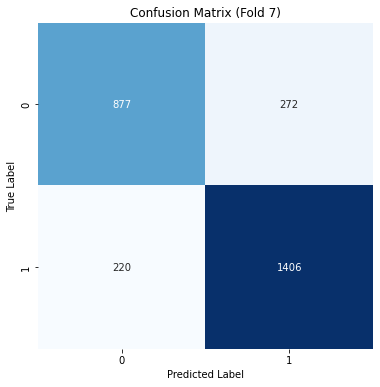

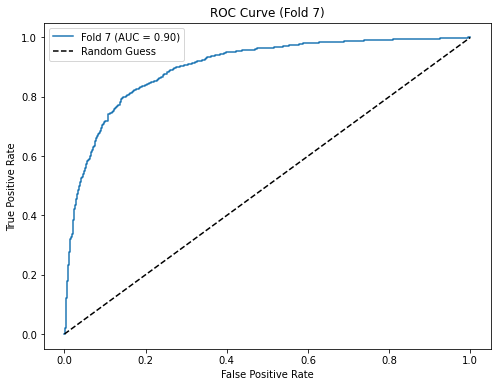


===== Fold 8 =====


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.516706	eval's binary_logloss: 0.537574
[20]	train's binary_logloss: 0.439546	eval's binary_logloss: 0.474301
[30]	train's binary_logloss: 0.393723	eval's binary_logloss: 0.438281
[40]	train's binary_logloss: 0.366085	eval's binary_logloss: 0.418656
[50]	train's binary_logloss: 0.348673	eval's binary_logloss: 0.407803
[60]	train's binary_logloss: 0.336752	eval's binary_logloss: 0.400936
[70]	train's binary_logloss: 0.328044	eval's binary_logloss: 0.397401
[80]	train's binary_logloss: 0.32069	eval's binary_logloss: 0.394401
[90]	train's binary_logloss: 0.314885	eval's binary_logloss: 0.393049
[100]	train's binary_logloss: 0.310018	eval's binary_logloss: 0.3928
[110]	train's binary_logloss: 0.305792	eval's binary_logloss: 0.392045
[120]	train's binary_logloss: 0.302498	eval's binary_logloss: 0.391833
[130]	train's binary_logloss: 0.29938	eval's binary_logloss: 0.391402
[140]	train's binary_logloss:

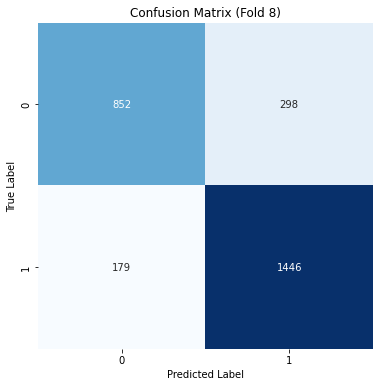

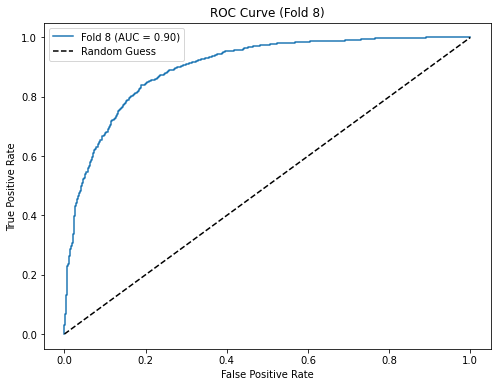


===== Fold 9 =====


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.517654	eval's binary_logloss: 0.529195
[20]	train's binary_logloss: 0.439693	eval's binary_logloss: 0.459635
[30]	train's binary_logloss: 0.394061	eval's binary_logloss: 0.420649
[40]	train's binary_logloss: 0.367226	eval's binary_logloss: 0.399552
[50]	train's binary_logloss: 0.350224	eval's binary_logloss: 0.388169
[60]	train's binary_logloss: 0.338418	eval's binary_logloss: 0.381714
[70]	train's binary_logloss: 0.328988	eval's binary_logloss: 0.3771
[80]	train's binary_logloss: 0.321826	eval's binary_logloss: 0.374506
[90]	train's binary_logloss: 0.316455	eval's binary_logloss: 0.372519
[100]	train's binary_logloss: 0.311882	eval's binary_logloss: 0.371065
[110]	train's binary_logloss: 0.308092	eval's binary_logloss: 0.370522
[120]	train's binary_logloss: 0.304943	eval's binary_logloss: 0.370183
[130]	train's binary_logloss: 0.301962	eval's binary_logloss: 0.369839
[140]	train's binary_loglos

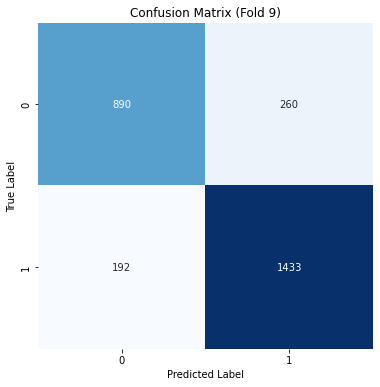

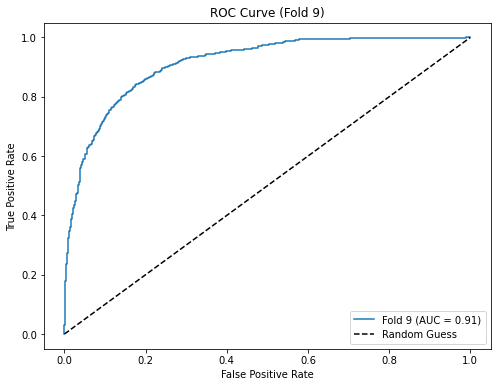


===== Fold 10 =====


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.51657	eval's binary_logloss: 0.529713
[20]	train's binary_logloss: 0.438277	eval's binary_logloss: 0.461442
[30]	train's binary_logloss: 0.393053	eval's binary_logloss: 0.423032
[40]	train's binary_logloss: 0.365957	eval's binary_logloss: 0.401982
[50]	train's binary_logloss: 0.348902	eval's binary_logloss: 0.390313
[60]	train's binary_logloss: 0.337303	eval's binary_logloss: 0.383324
[70]	train's binary_logloss: 0.32851	eval's binary_logloss: 0.378563
[80]	train's binary_logloss: 0.32157	eval's binary_logloss: 0.375963
[90]	train's binary_logloss: 0.315929	eval's binary_logloss: 0.374424
[100]	train's binary_logloss: 0.311549	eval's binary_logloss: 0.373741
[110]	train's binary_logloss: 0.307674	eval's binary_logloss: 0.372934
[120]	train's binary_logloss: 0.303984	eval's binary_logloss: 0.372891
[130]	train's binary_logloss: 0.300977	eval's binary_logloss: 0.372676
[140]	train's binary_logloss

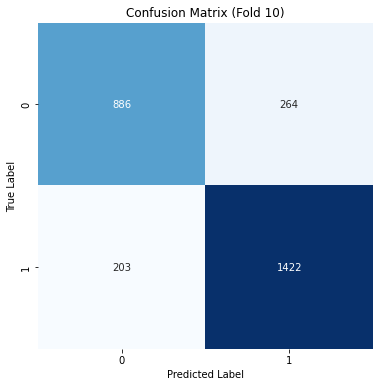

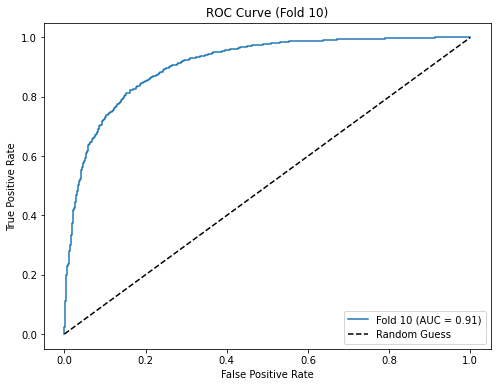


===== 10-Fold Cross-Validation Results =====
   Fold  Accuracy  Precision    Recall  F1-Score       AUC
0     1  0.828890   0.840331  0.873924  0.856798  0.906995
1     2  0.831052   0.848704  0.865929  0.857230  0.908005
2     3  0.835014   0.845154  0.879459  0.861965  0.903500
3     4  0.831772   0.848467  0.867774  0.858012  0.905593
4     5  0.817363   0.841367  0.848093  0.844717  0.891622
5     6  0.834955   0.849282  0.873309  0.861128  0.904951
6     7  0.822703   0.837902  0.864699  0.851090  0.899865
7     8  0.828108   0.829128  0.889846  0.858415  0.899423
8     9  0.837117   0.846426  0.881846  0.863773  0.912582
9    10  0.831712   0.843416  0.875077  0.858955  0.909962

===== Mean Results =====
Fold         5.500000
Accuracy     0.829869
Precision    0.843018
Recall       0.871995
F1-Score     0.857208
AUC          0.904250
dtype: float64

===== Std Results =====
Fold         3.027650
Accuracy     0.006010
Precision    0.006206
Recall       0.011380
F1-Score     0.0055

In [66]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE


# 初始化存儲交叉驗證結果的 DataFrame
cv_results = []

# 10-fold 交叉驗證
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(data_X, data_y), start=1):
    print(f"\n===== Fold {fold} =====")
    
    # 提取訓練集和測試集
    X_train, X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
    y_train, y_test = data_y.iloc[train_idx], data_y.iloc[test_idx]
    
    # 對訓練集進行類別平衡
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # 將標籤轉換為 int 型別
    y_train_resampled = y_train_resampled.astype(int)
    y_test = y_test.astype(int)

    # 指定類別型特徵的索引（只讀取類型為 category 的特徵）
    categorical_feature_indices = X_train_resampled.select_dtypes(include=['category']).columns.tolist()

    # 調整成LightGBM 需要的 Dataset 格式
    lgb_train = lgb.Dataset(X_train_resampled, label=y_train_resampled, categorical_feature=categorical_feature_indices)
    lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
    
    # 設置早停條件和記錄評估結果
    evals_result = {}
    callbacks = [
    lgb.early_stopping(stopping_rounds=50), # 如果模型在連續 50 次迭代中，驗證集的評估指標沒有改善，訓練將提前結束。
    lgb.log_evaluation(period=10), # 每 10 次迭代打印一次訓練過程的評估指標。
    lgb.record_evaluation(evals_result) # 記錄評估結果
    ]
    
    # 訓練模型
    gbm = lgb.train(
    params=params,  # 帶入超參數設定
    train_set=lgb_train,  # 選擇訓練資料
    valid_sets=[lgb_train, lgb_eval],
    valid_names=["train", "eval"],
    num_boost_round=1000, # 控制總共要建立1000棵決策樹
    callbacks=callbacks
    )
    
    # 預測
    y_pred_prob = gbm.predict(X_test)  # 預測機率
    y_pred = (y_pred_prob > 0.5).astype(int)  # 根據閾值 0.5 進行分類
    
    # 評估指標
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # 繪製混淆矩陣
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix (Fold {fold})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # 繪製 ROC 曲線
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Fold {fold} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title(f'ROC Curve (Fold {fold})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    # 保存每一折的結果
    cv_results.append({
        'Fold': fold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })

# 將結果轉為 DataFrame
cv_results_df = pd.DataFrame(cv_results)

# 打印平均結果
print("\n===== 10-Fold Cross-Validation Results =====")
print(cv_results_df)
print("\n===== Mean Results =====")
print(cv_results_df.mean())
print("\n===== Std Results =====")
print(cv_results_df.std())


## 特徵篩選後

In [67]:
#設定input、output
train_X = train_data[['Age', 'Academic Pressure', 'Study Satisfaction',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 
       'Work/Study Hours']]
train_y = train_data[['Depression']]

test_X = test_data[['Age', 'Academic Pressure', 'Study Satisfaction',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 
       'Work/Study Hours']]
test_y = test_data[['Depression']]

data_X = df[['Age', 'Academic Pressure', 'Study Satisfaction',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 
       'Work/Study Hours']]
data_y = df[['Depression']]

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


Training until validation scores don't improve for 50 rounds
[10]	train's binary_logloss: 0.536582	eval's binary_logloss: 0.545354
[20]	train's binary_logloss: 0.456824	eval's binary_logloss: 0.47156
[30]	train's binary_logloss: 0.412526	eval's binary_logloss: 0.431313
[40]	train's binary_logloss: 0.387584	eval's binary_logloss: 0.410762
[50]	train's binary_logloss: 0.371687	eval's binary_logloss: 0.398998
[60]	train's binary_logloss: 0.361811	eval's binary_logloss: 0.392613
[70]	train's binary_logloss: 0.354845	eval's binary_logloss: 0.388556
[80]	train's binary_logloss: 0.35022	eval's binary_logloss: 0.386459
[90]	train's binary_logloss: 0.346298	eval's binary_logloss: 0.385836
[100]	train's binary_logloss: 0.342765	eval's binary_logloss: 0.385301
[110]	train's binary_logloss: 0.340059	eval's binary_logloss: 0.384891
[120]	train's binary_logloss: 0.33754	eval's binary_logloss: 0.384864
[130]	train's binary_logloss: 0.335108	eval's binary_logloss: 0.384942
[140]	train's binary_logloss

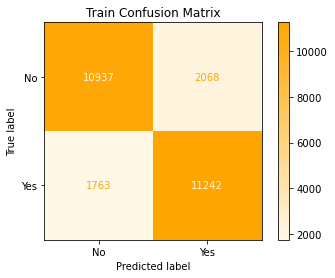

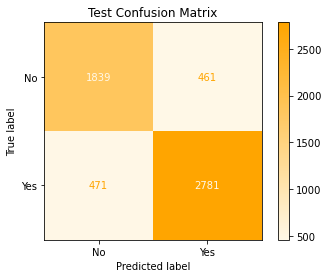

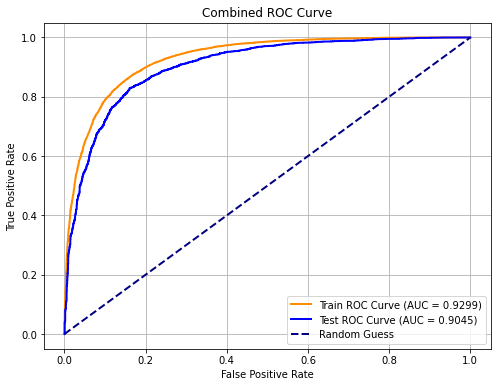


===== Learning Curve =====


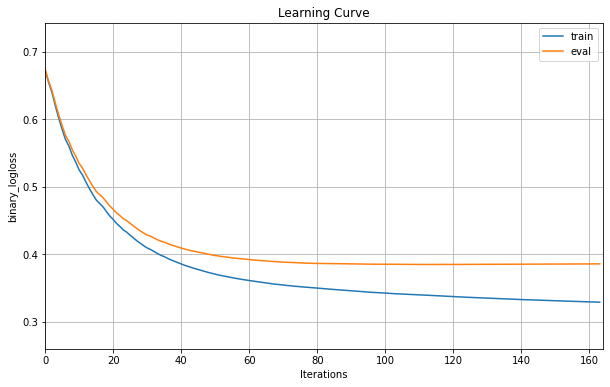

In [68]:
#80-20
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

# 使用 SMOTE 平衡訓練資料
smote = SMOTE(random_state=42)
train_X_resampled, train_y_resampled = smote.fit_resample(train_X, train_y)

# 將標籤轉換為 int 型別
train_y_resampled = train_y_resampled.astype(int)
test_y = test_y.astype(int)

# 指定類別型特徵的索引（只讀取類型為 category 的特徵）
categorical_feature_indices = train_X_resampled.select_dtypes(include=['category']).columns.tolist()

# 調整成 LightGBM 需要的 Dataset 格式，並指定類別型特徵
lgb_train = lgb.Dataset(train_X_resampled, label=train_y_resampled, categorical_feature=categorical_feature_indices)
lgb_eval = lgb.Dataset(test_X, label=test_y, reference=lgb_train)

# 設定超參數（未設定者採預設）
params = {
    'objective': 'binary',  # 二元分類
    'metric': 'binary_logloss',  # 評估指標
    'boosting_type': 'gbdt',  # 使用梯度提升決策樹
    'learning_rate': 0.05,  # 學習率
    'num_leaves': 31,  # 葉子節點數
    'max_depth': -1,  # 無限制樹深度
    'feature_fraction': 0.8,  # 特徵隨機抽樣比例
    'bagging_fraction': 0.8,  # 資料隨機抽樣比例
    'bagging_freq': 5,  # 每 5 次迭代進行一次隨機抽樣
    'verbose': -1,  # 禁止輸出過多訊息
    'random_state': 42  # 隨機種子
}

# 設置早停條件和記錄評估結果
evals_result = {}
callbacks = [
    lgb.early_stopping(stopping_rounds=50),  # 如果模型在連續 50 次迭代中，驗證集的評估指標沒有改善，訓練將提前結束。
    lgb.log_evaluation(period=10),  # 每 10 次迭代打印一次訓練過程的評估指標。
    lgb.record_evaluation(evals_result)  # 記錄評估結果
]

# 訓練模型
gbm = lgb.train(
    params=params,  # 帶入超參數設定
    train_set=lgb_train,  # 選擇訓練資料
    valid_sets=[lgb_train, lgb_eval],
    valid_names=["train", "eval"],
    num_boost_round=1000,  # 控制總共要建立 1000 棵決策樹
    callbacks=callbacks
)

# 預測
train_pred_prob = gbm.predict(train_X_resampled)
train_pred = (train_pred_prob > 0.5).astype(int)

test_pred_prob = gbm.predict(test_X)
test_pred = (test_pred_prob > 0.5).astype(int)

# 評估指標
def evaluate_results(y_true, y_pred, y_pred_prob, dataset_name="Dataset"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred_prob)
    print(f"\n===== {dataset_name} Evaluation =====")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc_score:.4f}")
    return accuracy, precision, recall, f1, auc_score

# 訓練集評估
evaluate_results(train_y_resampled, train_pred, train_pred_prob, "Train")

# 測試集評估
evaluate_results(test_y, test_pred, test_pred_prob, "Test")

# 繪製混淆矩陣
def plot_confusion_matrix(y_true, y_pred, dataset_name="Dataset"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No", "Yes"])
    
    # 自定義顏色
    cmap = mcolors.LinearSegmentedColormap.from_list("custom", ["#fff8e7", "#ffa500"])
    
    disp.plot(cmap=cmap)  # 使用自定義的橙黃色
    plt.title(f"{dataset_name} Confusion Matrix")
    plt.show()

# 繪製訓練集和測試集的混淆矩陣
plot_confusion_matrix(train_y_resampled, train_pred, "Train")
plot_confusion_matrix(test_y, test_pred, "Test")


# 繪製 ROC 曲線（Train 和 Test）
def plot_combined_roc_curve(y_train_true, y_train_pred_prob, y_test_true, y_test_pred_prob):
    # 計算 Train ROC 曲線
    fpr_train, tpr_train, _ = roc_curve(y_train_true, y_train_pred_prob)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    # 計算 Test ROC 曲線
    fpr_test, tpr_test, _ = roc_curve(y_test_true, y_test_pred_prob)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # 繪圖
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color="darkorange", lw=2, label=f"Train ROC Curve (AUC = {roc_auc_train:.4f})")
    plt.plot(fpr_test, tpr_test, color="blue", lw=2, label=f"Test ROC Curve (AUC = {roc_auc_test:.4f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Combined ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# 調用函數繪製 ROC 曲線
plot_combined_roc_curve(train_y_resampled, train_pred_prob, test_y, test_pred_prob)


# 繪製學習曲線
print("\n===== Learning Curve =====")
lgb.plot_metric(evals_result, metric="binary_logloss", figsize=(10, 6))
plt.title("Learning Curve")
plt.show()



===== SHAP Analysis =====

===== Train SHAP Analysis =====


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


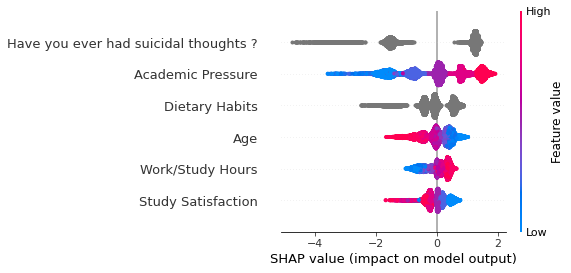

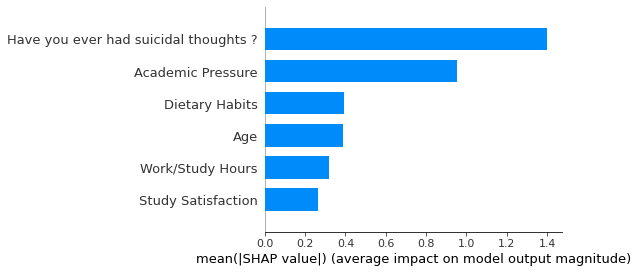


===== SHAP Dependence Plot for Dietary Habits =====


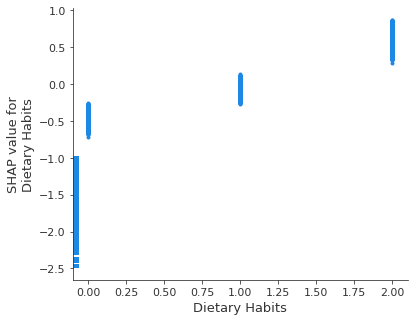


===== SHAP Dependence Plot for Have you ever had suicidal thoughts ? =====


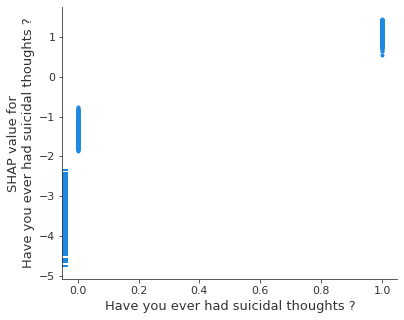


===== Test SHAP Analysis =====


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


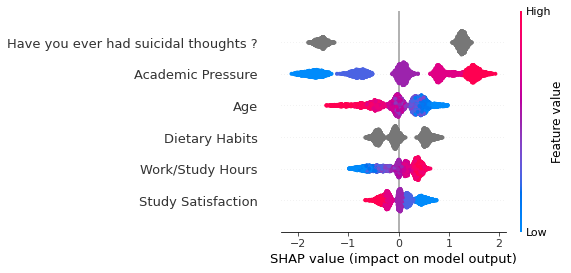

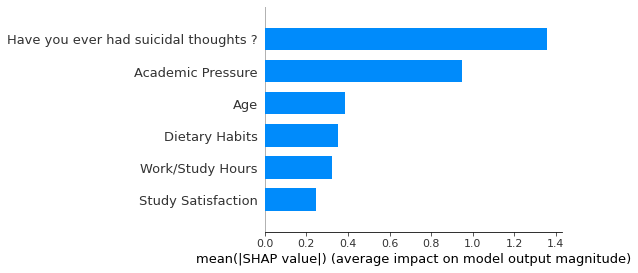


===== SHAP Dependence Plot for Dietary Habits =====


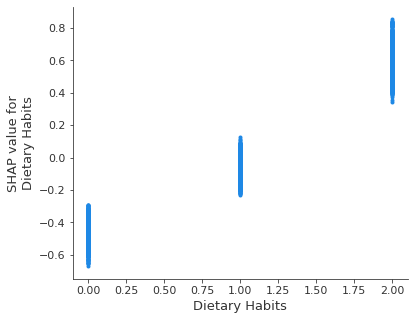


===== SHAP Dependence Plot for Have you ever had suicidal thoughts ? =====


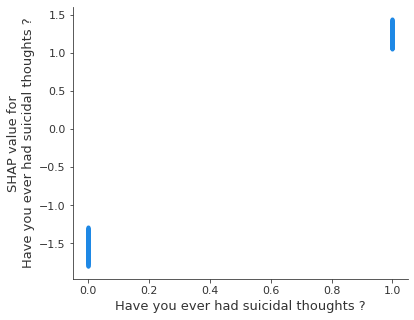

In [69]:
# SHAP 分析
print("\n===== SHAP Analysis =====")
explainer = shap.TreeExplainer(gbm)

# 找出類別型特徵
categorical_features = train_X_resampled.select_dtypes(include='category').columns

# 訓練集 SHAP 分析
print("\n===== Train SHAP Analysis =====")
train_shap_values = explainer.shap_values(train_X_resampled)

# SHAP Summary Plot（散布圖）
shap.summary_plot(train_shap_values[1], train_X_resampled, feature_names=train_X_resampled.columns)
plt.show()

# SHAP Summary Plot（條形圖）
shap.summary_plot(train_shap_values[1], train_X_resampled, plot_type="bar", feature_names=train_X_resampled.columns)
plt.show()

# 對每個類別型特徵繪製 SHAP Dependence Plot
for feature in categorical_features:
    print(f"\n===== SHAP Dependence Plot for {feature} =====")
    shap.dependence_plot(feature, train_shap_values[1], train_X_resampled, interaction_index=None)
    plt.show()

# 測試集 SHAP 分析
print("\n===== Test SHAP Analysis =====")
test_shap_values = explainer.shap_values(test_X)

# Test SHAP Summary Plot（散布圖）
shap.summary_plot(test_shap_values[1], test_X, feature_names=test_X.columns)
plt.show()

# Test SHAP Summary Plot（條形圖）
shap.summary_plot(test_shap_values[1], test_X, plot_type="bar", feature_names=test_X.columns)
plt.show()

# 對測試集的每個類別型特徵繪製 SHAP Dependence Plot
for feature in categorical_features:
    print(f"\n===== SHAP Dependence Plot for {feature} =====")
    shap.dependence_plot(feature, test_shap_values[1], test_X, interaction_index=None)
    plt.show()



===== Fold 1 =====
Training until validation scores don't improve for 50 rounds


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


[10]	train's binary_logloss: 0.537411	eval's binary_logloss: 0.545095
[20]	train's binary_logloss: 0.45698	eval's binary_logloss: 0.470046
[30]	train's binary_logloss: 0.412097	eval's binary_logloss: 0.429284
[40]	train's binary_logloss: 0.387604	eval's binary_logloss: 0.408404
[50]	train's binary_logloss: 0.37208	eval's binary_logloss: 0.39647
[60]	train's binary_logloss: 0.362192	eval's binary_logloss: 0.38954
[70]	train's binary_logloss: 0.355594	eval's binary_logloss: 0.385395
[80]	train's binary_logloss: 0.350722	eval's binary_logloss: 0.383386
[90]	train's binary_logloss: 0.346927	eval's binary_logloss: 0.38221
[100]	train's binary_logloss: 0.343671	eval's binary_logloss: 0.381173
[110]	train's binary_logloss: 0.341017	eval's binary_logloss: 0.38066
[120]	train's binary_logloss: 0.338711	eval's binary_logloss: 0.380499
[130]	train's binary_logloss: 0.336493	eval's binary_logloss: 0.380691
[140]	train's binary_logloss: 0.334457	eval's binary_logloss: 0.380977
[150]	train's binary_

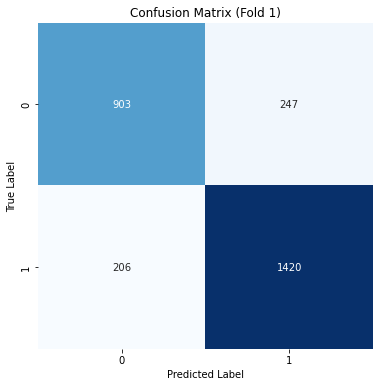

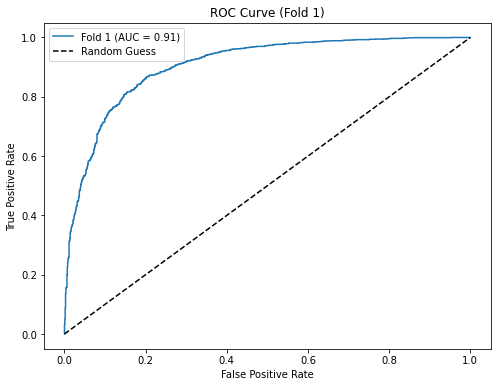


===== Fold 2 =====
Training until validation scores don't improve for 50 rounds


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


[10]	train's binary_logloss: 0.538522	eval's binary_logloss: 0.54324
[20]	train's binary_logloss: 0.459411	eval's binary_logloss: 0.46808
[30]	train's binary_logloss: 0.415234	eval's binary_logloss: 0.427028
[40]	train's binary_logloss: 0.390319	eval's binary_logloss: 0.405503
[50]	train's binary_logloss: 0.374772	eval's binary_logloss: 0.393607
[60]	train's binary_logloss: 0.365141	eval's binary_logloss: 0.386683
[70]	train's binary_logloss: 0.358365	eval's binary_logloss: 0.383455
[80]	train's binary_logloss: 0.353413	eval's binary_logloss: 0.381439
[90]	train's binary_logloss: 0.349159	eval's binary_logloss: 0.380626
[100]	train's binary_logloss: 0.345924	eval's binary_logloss: 0.379729
[110]	train's binary_logloss: 0.342821	eval's binary_logloss: 0.379466
[120]	train's binary_logloss: 0.340256	eval's binary_logloss: 0.379845
[130]	train's binary_logloss: 0.337932	eval's binary_logloss: 0.379818
[140]	train's binary_logloss: 0.335993	eval's binary_logloss: 0.379826
[150]	train's bin

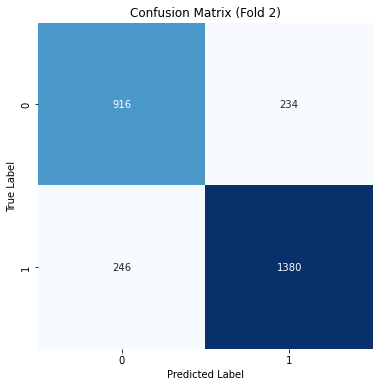

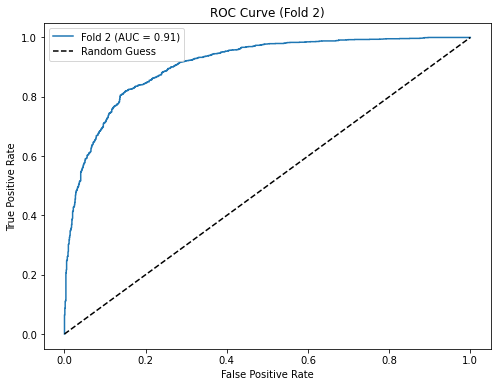


===== Fold 3 =====
Training until validation scores don't improve for 50 rounds


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


[10]	train's binary_logloss: 0.536135	eval's binary_logloss: 0.54726
[20]	train's binary_logloss: 0.456528	eval's binary_logloss: 0.473841
[30]	train's binary_logloss: 0.412093	eval's binary_logloss: 0.435032
[40]	train's binary_logloss: 0.387322	eval's binary_logloss: 0.415514
[50]	train's binary_logloss: 0.371733	eval's binary_logloss: 0.404213
[60]	train's binary_logloss: 0.362072	eval's binary_logloss: 0.397839
[70]	train's binary_logloss: 0.355402	eval's binary_logloss: 0.394401
[80]	train's binary_logloss: 0.350097	eval's binary_logloss: 0.392296
[90]	train's binary_logloss: 0.346025	eval's binary_logloss: 0.391093
[100]	train's binary_logloss: 0.342652	eval's binary_logloss: 0.39028
[110]	train's binary_logloss: 0.33965	eval's binary_logloss: 0.389838
[120]	train's binary_logloss: 0.337313	eval's binary_logloss: 0.38956
[130]	train's binary_logloss: 0.335004	eval's binary_logloss: 0.3895
[140]	train's binary_logloss: 0.333237	eval's binary_logloss: 0.389406
[150]	train's binary_

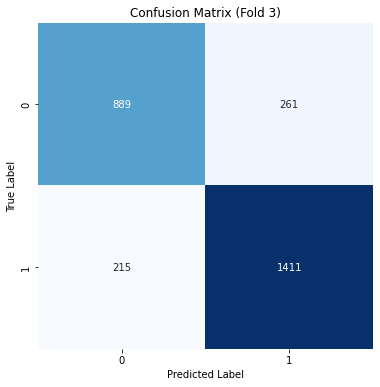

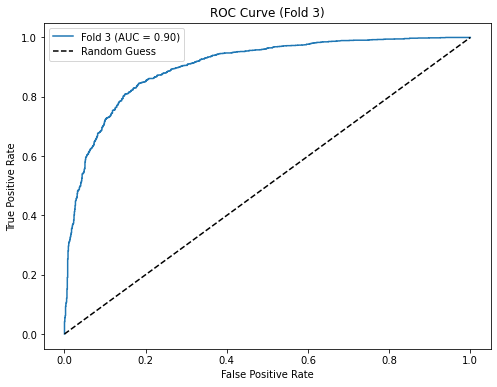


===== Fold 4 =====
Training until validation scores don't improve for 50 rounds

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



[10]	train's binary_logloss: 0.537398	eval's binary_logloss: 0.545982
[20]	train's binary_logloss: 0.458321	eval's binary_logloss: 0.472843
[30]	train's binary_logloss: 0.414221	eval's binary_logloss: 0.432638
[40]	train's binary_logloss: 0.388836	eval's binary_logloss: 0.412474
[50]	train's binary_logloss: 0.373435	eval's binary_logloss: 0.401071
[60]	train's binary_logloss: 0.363806	eval's binary_logloss: 0.394452
[70]	train's binary_logloss: 0.357343	eval's binary_logloss: 0.39029
[80]	train's binary_logloss: 0.352767	eval's binary_logloss: 0.388511
[90]	train's binary_logloss: 0.348478	eval's binary_logloss: 0.387623
[100]	train's binary_logloss: 0.344933	eval's binary_logloss: 0.387325
[110]	train's binary_logloss: 0.342041	eval's binary_logloss: 0.386831
[120]	train's binary_logloss: 0.339591	eval's binary_logloss: 0.386989
[130]	train's binary_logloss: 0.337392	eval's binary_logloss: 0.386992
[140]	train's binary_logloss: 0.335112	eval's binary_logloss: 0.3872
[150]	train's bin

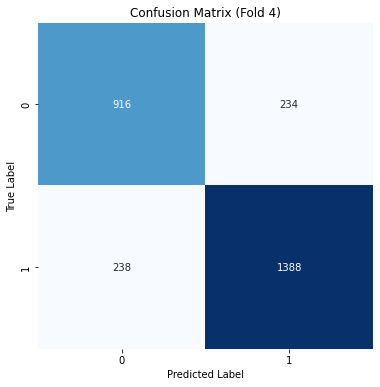

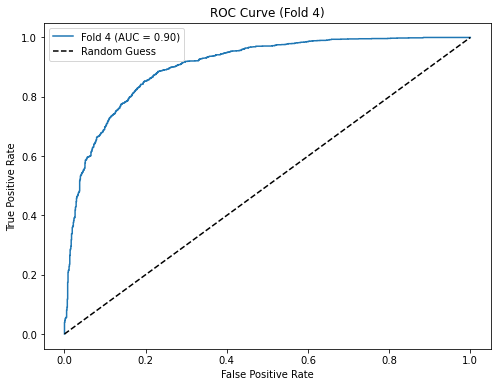


===== Fold 5 =====
Training until validation scores don't improve for 50 rounds

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



[10]	train's binary_logloss: 0.535959	eval's binary_logloss: 0.55575
[20]	train's binary_logloss: 0.455665	eval's binary_logloss: 0.488554
[30]	train's binary_logloss: 0.411498	eval's binary_logloss: 0.454193
[40]	train's binary_logloss: 0.38683	eval's binary_logloss: 0.436504
[50]	train's binary_logloss: 0.37098	eval's binary_logloss: 0.42708
[60]	train's binary_logloss: 0.361307	eval's binary_logloss: 0.421996
[70]	train's binary_logloss: 0.354588	eval's binary_logloss: 0.419373
[80]	train's binary_logloss: 0.349725	eval's binary_logloss: 0.417559
[90]	train's binary_logloss: 0.345541	eval's binary_logloss: 0.416362
[100]	train's binary_logloss: 0.342481	eval's binary_logloss: 0.41589
[110]	train's binary_logloss: 0.33981	eval's binary_logloss: 0.41564
[120]	train's binary_logloss: 0.337011	eval's binary_logloss: 0.414839
[130]	train's binary_logloss: 0.334708	eval's binary_logloss: 0.414962
[140]	train's binary_logloss: 0.332731	eval's binary_logloss: 0.414855
[150]	train's binary_

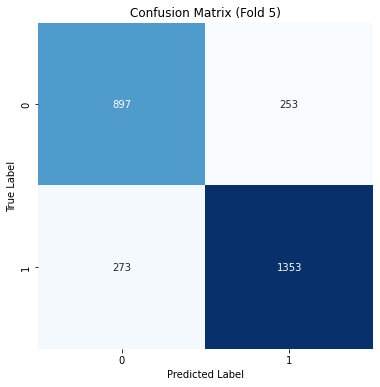

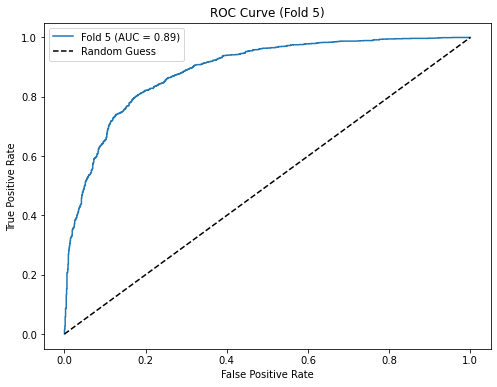


===== Fold 6 =====
Training until validation scores don't improve for 50 rounds

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



[10]	train's binary_logloss: 0.536588	eval's binary_logloss: 0.545057
[20]	train's binary_logloss: 0.456192	eval's binary_logloss: 0.471904
[30]	train's binary_logloss: 0.411181	eval's binary_logloss: 0.432796
[40]	train's binary_logloss: 0.386607	eval's binary_logloss: 0.412976
[50]	train's binary_logloss: 0.371412	eval's binary_logloss: 0.401494
[60]	train's binary_logloss: 0.361738	eval's binary_logloss: 0.395319
[70]	train's binary_logloss: 0.355285	eval's binary_logloss: 0.392179
[80]	train's binary_logloss: 0.350276	eval's binary_logloss: 0.390258
[90]	train's binary_logloss: 0.346046	eval's binary_logloss: 0.389431
[100]	train's binary_logloss: 0.342524	eval's binary_logloss: 0.38886
[110]	train's binary_logloss: 0.339934	eval's binary_logloss: 0.388695
[120]	train's binary_logloss: 0.337468	eval's binary_logloss: 0.388947
[130]	train's binary_logloss: 0.335358	eval's binary_logloss: 0.388941
[140]	train's binary_logloss: 0.33341	eval's binary_logloss: 0.388911
[150]	train's bi

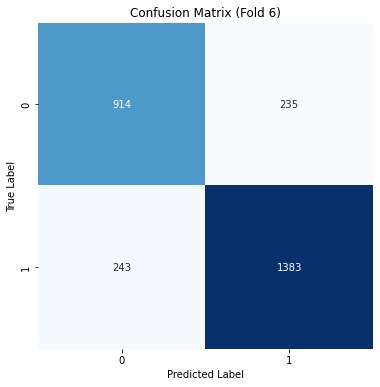

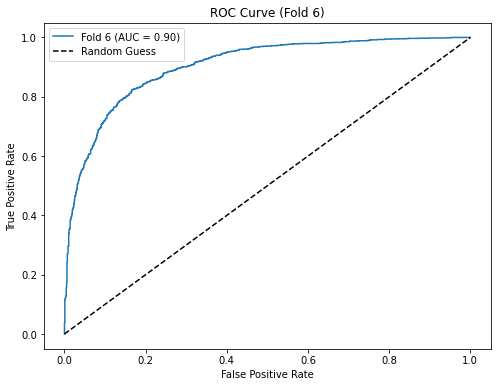


===== Fold 7 =====
Training until validation scores don't improve for 50 rounds


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


[10]	train's binary_logloss: 0.536751	eval's binary_logloss: 0.548855
[20]	train's binary_logloss: 0.456223	eval's binary_logloss: 0.47808
[30]	train's binary_logloss: 0.411482	eval's binary_logloss: 0.441225
[40]	train's binary_logloss: 0.386705	eval's binary_logloss: 0.422038
[50]	train's binary_logloss: 0.37141	eval's binary_logloss: 0.411806
[60]	train's binary_logloss: 0.361827	eval's binary_logloss: 0.406366
[70]	train's binary_logloss: 0.355026	eval's binary_logloss: 0.403306
[80]	train's binary_logloss: 0.349874	eval's binary_logloss: 0.402374
[90]	train's binary_logloss: 0.345469	eval's binary_logloss: 0.401609
[100]	train's binary_logloss: 0.342182	eval's binary_logloss: 0.400854
[110]	train's binary_logloss: 0.339481	eval's binary_logloss: 0.400994
[120]	train's binary_logloss: 0.33692	eval's binary_logloss: 0.401044
[130]	train's binary_logloss: 0.335011	eval's binary_logloss: 0.401007
[140]	train's binary_logloss: 0.332784	eval's binary_logloss: 0.40138
[150]	train's binar

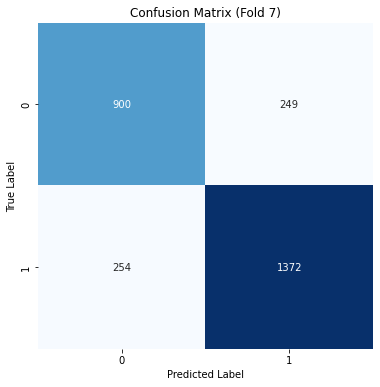

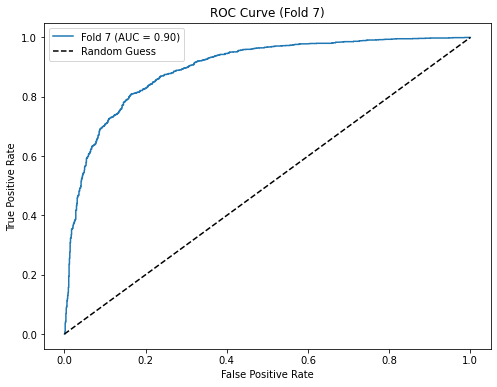


===== Fold 8 =====
Training until validation scores don't improve for 50 rounds

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



[10]	train's binary_logloss: 0.536995	eval's binary_logloss: 0.548387
[20]	train's binary_logloss: 0.457467	eval's binary_logloss: 0.476926
[30]	train's binary_logloss: 0.412667	eval's binary_logloss: 0.438656
[40]	train's binary_logloss: 0.387303	eval's binary_logloss: 0.41887
[50]	train's binary_logloss: 0.371879	eval's binary_logloss: 0.407421
[60]	train's binary_logloss: 0.362111	eval's binary_logloss: 0.400874
[70]	train's binary_logloss: 0.355802	eval's binary_logloss: 0.397775
[80]	train's binary_logloss: 0.350882	eval's binary_logloss: 0.395674
[90]	train's binary_logloss: 0.347227	eval's binary_logloss: 0.394137
[100]	train's binary_logloss: 0.344104	eval's binary_logloss: 0.393423
[110]	train's binary_logloss: 0.341198	eval's binary_logloss: 0.392796
[120]	train's binary_logloss: 0.338637	eval's binary_logloss: 0.392888
[130]	train's binary_logloss: 0.336294	eval's binary_logloss: 0.392939
[140]	train's binary_logloss: 0.334486	eval's binary_logloss: 0.392981
[150]	train's b

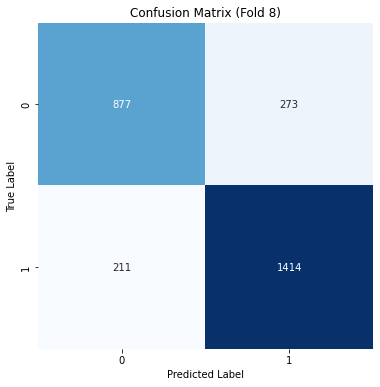

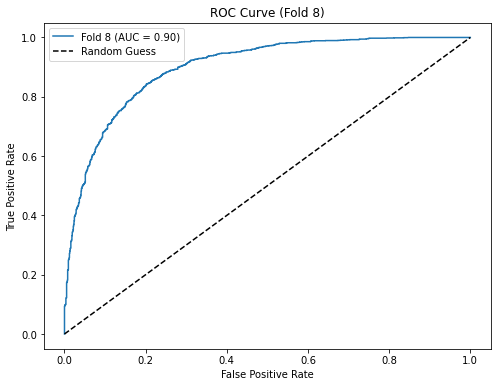


===== Fold 9 =====
Training until validation scores don't improve for 50 rounds

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



[10]	train's binary_logloss: 0.537821	eval's binary_logloss: 0.542069
[20]	train's binary_logloss: 0.458851	eval's binary_logloss: 0.465019
[30]	train's binary_logloss: 0.414618	eval's binary_logloss: 0.423168
[40]	train's binary_logloss: 0.390063	eval's binary_logloss: 0.40226
[50]	train's binary_logloss: 0.374742	eval's binary_logloss: 0.39022
[60]	train's binary_logloss: 0.364971	eval's binary_logloss: 0.383028
[70]	train's binary_logloss: 0.358334	eval's binary_logloss: 0.378772
[80]	train's binary_logloss: 0.35366	eval's binary_logloss: 0.37632
[90]	train's binary_logloss: 0.349773	eval's binary_logloss: 0.374737
[100]	train's binary_logloss: 0.34625	eval's binary_logloss: 0.373997
[110]	train's binary_logloss: 0.343258	eval's binary_logloss: 0.37381
[120]	train's binary_logloss: 0.340789	eval's binary_logloss: 0.373525
[130]	train's binary_logloss: 0.338508	eval's binary_logloss: 0.373164
[140]	train's binary_logloss: 0.336401	eval's binary_logloss: 0.373321
[150]	train's binary

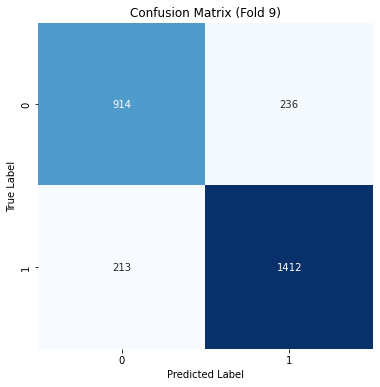

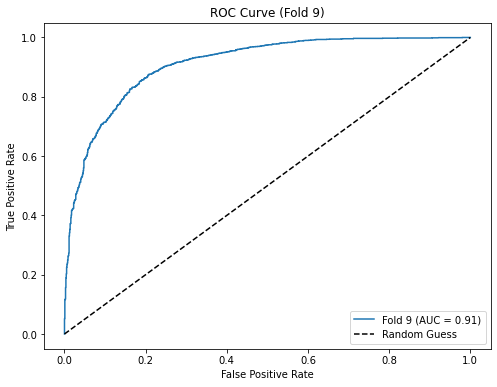


===== Fold 10 =====
Training until validation scores don't improve for 50 rounds


Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.


[10]	train's binary_logloss: 0.537092	eval's binary_logloss: 0.541913
[20]	train's binary_logloss: 0.457399	eval's binary_logloss: 0.465719
[30]	train's binary_logloss: 0.412989	eval's binary_logloss: 0.424203
[40]	train's binary_logloss: 0.38853	eval's binary_logloss: 0.402899
[50]	train's binary_logloss: 0.373422	eval's binary_logloss: 0.39055
[60]	train's binary_logloss: 0.364064	eval's binary_logloss: 0.383121
[70]	train's binary_logloss: 0.357562	eval's binary_logloss: 0.3789
[80]	train's binary_logloss: 0.352726	eval's binary_logloss: 0.376841
[90]	train's binary_logloss: 0.348506	eval's binary_logloss: 0.375319
[100]	train's binary_logloss: 0.345511	eval's binary_logloss: 0.37476
[110]	train's binary_logloss: 0.342617	eval's binary_logloss: 0.37448
[120]	train's binary_logloss: 0.339958	eval's binary_logloss: 0.37446
[130]	train's binary_logloss: 0.337814	eval's binary_logloss: 0.374218
[140]	train's binary_logloss: 0.336082	eval's binary_logloss: 0.374204
[150]	train's binary_l

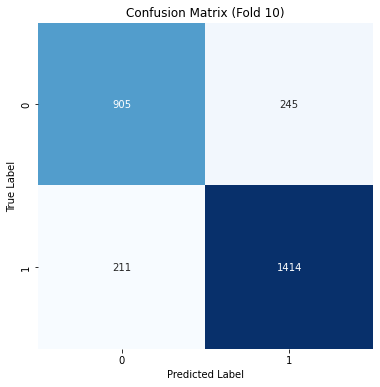

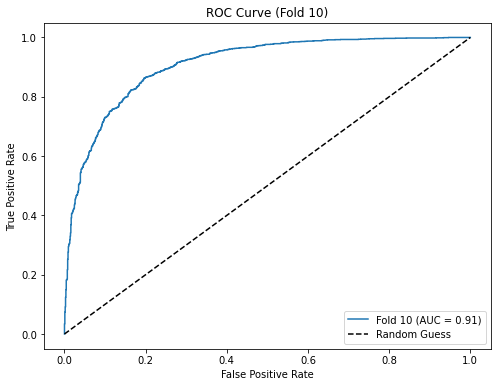


===== 10-Fold Cross-Validation Results =====
   Fold  Accuracy  Precision    Recall  F1-Score       AUC
0     1  0.836816   0.851830  0.873309  0.862435  0.905802
1     2  0.827089   0.855019  0.848708  0.851852  0.908352
2     3  0.828530   0.843900  0.867774  0.855670  0.902373
3     4  0.829971   0.855734  0.853629  0.854680  0.903262
4     5  0.810519   0.842466  0.832103  0.837252  0.888817
5     6  0.827748   0.854759  0.850554  0.852651  0.903848
6     7  0.818739   0.846391  0.843788  0.845088  0.897057
7     8  0.825586   0.838174  0.870154  0.853865  0.898606
8     9  0.838198   0.856796  0.868923  0.862817  0.910555
9    10  0.835676   0.852321  0.870154  0.861145  0.909291

===== Mean Results =====
Fold         5.500000
Accuracy     0.827887
Precision    0.849739
Recall       0.857910
F1-Score     0.853746
AUC          0.902796
dtype: float64

===== Std Results =====
Fold         3.027650
Accuracy     0.008451
Precision    0.006513
Recall       0.014056
F1-Score     0.0079

In [70]:
#10-fold
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE


# 初始化存儲交叉驗證結果的 DataFrame
cv_results = []

# 10-fold 交叉驗證
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(data_X, data_y), start=1):
    print(f"\n===== Fold {fold} =====")
    
    # 提取訓練集和測試集
    X_train, X_test = data_X.iloc[train_idx], data_X.iloc[test_idx]
    y_train, y_test = data_y.iloc[train_idx], data_y.iloc[test_idx]
    
    # 對訓練集進行類別平衡
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # 將標籤轉換為 int 型別
    y_train_resampled = y_train_resampled.astype(int)
    y_test = y_test.astype(int)

    # 指定類別型特徵的索引（只讀取類型為 category 的特徵）
    categorical_feature_indices = X_train_resampled.select_dtypes(include=['category']).columns.tolist()

    # 調整成LightGBM 需要的 Dataset 格式
    lgb_train = lgb.Dataset(X_train_resampled, label=y_train_resampled, categorical_feature=categorical_feature_indices)
    lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)
    
    # 設置早停條件和記錄評估結果
    evals_result = {}
    callbacks = [
    lgb.early_stopping(stopping_rounds=50), # 如果模型在連續 50 次迭代中，驗證集的評估指標沒有改善，訓練將提前結束。
    lgb.log_evaluation(period=10), # 每 10 次迭代打印一次訓練過程的評估指標。
    lgb.record_evaluation(evals_result) # 記錄評估結果
    ]
    
    # 訓練模型
    gbm = lgb.train(
    params=params,  # 帶入超參數設定
    train_set=lgb_train,  # 選擇訓練資料
    valid_sets=[lgb_train, lgb_eval],
    valid_names=["train", "eval"],
    num_boost_round=1000, # 控制總共要建立1000棵決策樹
    callbacks=callbacks
    )
    
    # 預測
    y_pred_prob = gbm.predict(X_test)  # 預測機率
    y_pred = (y_pred_prob > 0.5).astype(int)  # 根據閾值 0.5 進行分類
    
    # 評估指標
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # 繪製混淆矩陣
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix (Fold {fold})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # 繪製 ROC 曲線
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'Fold {fold} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title(f'ROC Curve (Fold {fold})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    
    # 保存每一折的結果
    cv_results.append({
        'Fold': fold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    })

# 將結果轉為 DataFrame
cv_results_df = pd.DataFrame(cv_results)

# 打印平均結果
print("\n===== 10-Fold Cross-Validation Results =====")
print(cv_results_df)
print("\n===== Mean Results =====")
print(cv_results_df.mean())
print("\n===== Std Results =====")
print(cv_results_df.std())
